In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
df=pd.read_csv(r"/content/Micro-credit-Data-file (1).csv")
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

       pdate  
0  7/20/2016  
1  8/10/2016  
2  8/19/2016  
3   6/6/2016  
4  6/22/2016  

[5 rows x 37 columns]

In [ ]:
df.tail()

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
209588                6                 0.0        1.0   1.000000      UPW   
209589                6                 0.0        1.0   1.000000      UPW   
209590               12                 0.0        4.0   3.833333      UPW   
209591               12                 0.0        0.0  10.500000      UPW   
209592               12                 0.0        0.0   0.000000      UPW   

            pdate  
209588  6/17/2016  
209589  6/12/2016  
209590  7/29/2016  
209591  7/25/2016  
209592   7/7/2016  

[5 rows x 37 columns]

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [ ]:
df.shape

(209593, 37)

In [ ]:

df = df.rename(columns={
    "Unnamed: 0": "row_id",
    "label": "churn_label",
    "msisdn": "customer_id",
    "aon": "age_on_network_days",
    "daily_decr30": "avg_daily_decr_30d",
    "daily_decr90": "avg_daily_decr_90d",
    "rental30": "total_rental_30d",
    "rental90": "total_rental_90d",
    "last_rech_date_ma": "last_recharge_date_ma",
    "last_rech_date_da": "last_recharge_date_da",
    "last_rech_amt_ma": "last_recharge_amt_ma",
    "cnt_ma_rech30": "count_ma_recharges_30d",
    "fr_ma_rech30": "freq_ma_recharges_30d",
    "sumamnt_ma_rech30": "sum_amt_ma_recharges_30d",
    "medianamnt_ma_rech30": "median_amt_ma_recharges_30d",
    "medianmarechprebal30": "median_ma_rech_prebal_30d",
    "cnt_ma_rech90": "count_ma_recharges_90d",
    "fr_ma_rech90": "freq_ma_recharges_90d",
    "sumamnt_ma_rech90": "sum_amt_ma_recharges_90d",
    "medianamnt_ma_rech90": "median_amt_ma_recharges_90d",
    "medianmarechprebal90": "median_ma_rech_prebal_90d",
    "cnt_da_rech30": "count_da_recharges_30d",
    "fr_da_rech30": "freq_da_recharges_30d",
    "cnt_da_rech90": "count_da_recharges_90d",
    "fr_da_rech90": "freq_da_recharges_90d",
    "cnt_loans30": "count_loans_30d",
    "amnt_loans30": "total_amt_loans_30d",
    "maxamnt_loans30": "max_amt_loans_30d",
    "medianamnt_loans30": "median_amt_loans_30d",
    "cnt_loans90": "count_loans_90d",
    "amnt_loans90": "total_amt_loans_90d",
    "maxamnt_loans90": "max_amt_loans_90d",
    "medianamnt_loans90": "median_amt_loans_90d",
    "payback30": "loan_payback_ratio_30d",
    "payback90": "loan_payback_ratio_90d",
    "pcircle": "customer_circle",
    "pdate": "record_date"
})

In [ ]:
df.isnull().sum()

row_id                         0
churn_label                    0
customer_id                    0
age_on_network_days            0
avg_daily_decr_30d             0
avg_daily_decr_90d             0
total_rental_30d               0
total_rental_90d               0
last_recharge_date_ma          0
last_recharge_date_da          0
last_recharge_amt_ma           0
count_ma_recharges_30d         0
freq_ma_recharges_30d          0
sum_amt_ma_recharges_30d       0
median_amt_ma_recharges_30d    0
median_ma_rech_prebal_30d      0
count_ma_recharges_90d         0
freq_ma_recharges_90d          0
sum_amt_ma_recharges_90d       0
median_amt_ma_recharges_90d    0
median_ma_rech_prebal_90d      0
count_da_recharges_30d         0
freq_da_recharges_30d          0
count_da_recharges_90d         0
freq_da_recharges_90d          0
count_loans_30d                0
total_amt_loans_30d            0
max_amt_loans_30d              0
median_amt_loans_30d           0
count_loans_90d                0
total_amt_loans_90d            0
max_amt_loans_90d              0
median_amt_loans_90d           0
loan_payback_ratio_30d         0
loan_payback_ratio_90d         0
customer_circle                0
record_date                    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

# No Null value in Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   row_id                       209593 non-null  int64  
 1   churn_label                  209593 non-null  int64  
 2   customer_id                  209593 non-null  object 
 3   age_on_network_days          209593 non-null  float64
 4   avg_daily_decr_30d           209593 non-null  float64
 5   avg_daily_decr_90d           209593 non-null  float64
 6   total_rental_30d             209593 non-null  float64
 7   total_rental_90d             209593 non-null  float64
 8   last_recharge_date_ma        209593 non-null  float64
 9   last_recharge_date_da        209593 non-null  float64
 10  last_recharge_amt_ma         209593 non-null  int64  
 11  count_ma_recharges_30d       209593 non-null  int64  
 12  freq_ma_recharges_30d        209593 non-null  float64
 13 

In [ ]:
df.describe()

row_id    churn_label  age_on_network_days  avg_daily_decr_30d  \
count  209593.000000  209593.000000        209593.000000       209593.000000   
mean   104797.000000       0.875177          8112.343445         5381.402289   
std     60504.431823       0.330519         75696.082531         9220.623400   
min         1.000000       0.000000           -48.000000          -93.012667   
25%     52399.000000       1.000000           246.000000           42.440000   
50%    104797.000000       1.000000           527.000000         1469.175667   
75%    157195.000000       1.000000           982.000000         7244.000000   
max    209593.000000       1.000000        999860.755200       265926.000000   

       avg_daily_decr_90d  total_rental_30d  total_rental_90d  \
count       209593.000000     209593.000000     209593.000000   
mean          6082.515068       2692.581910       3483.406534   
std          10918.812767       4308.586781       5770.461279   
min            -93.012667     -23737.140000     -24720.580000   
25%             42.692000        280.420000        300.260000   
50%           1500.000000       1083.570000       1334.000000   
75%           7802.790000       3356.940000       4201.790000   
max         320630.000000     198926.110000     200148.110000   

       last_recharge_date_ma  last_recharge_date_da  last_recharge_amt_ma  \
count           209593.00000          209593.000000         209593.000000   
mean              3755.84780            3712.202921           2064.452797   
std              53905.89223           53374.833430           2370.786034   
min                -29.00000             -29.000000              0.000000   
25%                  1.00000               0.000000            770.000000   
50%                  3.00000               0.000000           1539.000000   
75%                  7.00000               0.000000           2309.000000   
max             998650.37770          999171.809400          55000.000000   

       count_ma_recharges_30d  freq_ma_recharges_30d  \
count           209593.000000          209593.000000   
mean                 3.978057            3737.355121   
std                  4.256090           53643.625172   
min                  0.000000               0.000000   
25%                  1.000000               0.000000   
50%                  3.000000               2.000000   
75%                  5.000000               6.000000   
max                203.000000          999606.368100   

       sum_amt_ma_recharges_30d  median_amt_ma_recharges_30d  \
count             209593.000000                209593.000000   
mean                7704.501157                  1812.817952   
std                10139.621714                  2070.864620   
min                    0.000000                     0.000000   
25%                 1540.000000                   770.000000   
50%                 4628.000000                  1539.000000   
75%                10010.000000                  1924.000000   
max               810096.000000                 55000.000000   

       median_ma_rech_prebal_30d  count_ma_recharges_90d  \
count              209593.000000            209593.00000   
mean                 3851.927942                 6.31543   
std                 54006.374433                 7.19347   
min                  -200.000000                 0.00000   
25%                    11.000000                 2.00000   
50%                    33.900000                 4.00000   
75%                    83.000000                 8.00000   
max                999479.419300               336.00000   

       freq_ma_recharges_90d  sum_amt_ma_recharges_90d  \
count          209593.000000             209593.000000   
mean                7.716780              12396.218352   
std                12.590251              16857.793882   
min                 0.000000                  0.000000   
25%                 0.000000               2317.000000   
50%                 2.000000              

# LABELE ENCODING

In [ ]:
df_copy=df.copy()
df_copy["customer_id"] = df_copy["customer_id"].str.extract('(\d+)').astype(float)
df_copy["record_date"] = pd.to_datetime(df_copy["record_date"])



<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2207968575.py:2: SyntaxWarning: invalid escape sequence '\d'
  df_copy["customer_id"] = df_copy["customer_id"].str.extract('(\d+)').astype(float)


In [ ]:
df_copy["record_date"] = df_copy["record_date"].astype("int64") // 10**9
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()


In [ ]:
df_copy["customer_circle"]=la.fit_transform(df_copy["customer_circle"])
df_copy.head()

row_id  churn_label  customer_id  age_on_network_days  avg_daily_decr_30d  \
0       1            0      21408.0                272.0         3055.050000   
1       2            1      76462.0                712.0        12122.000000   
2       3            1      17943.0                535.0         1398.000000   
3       4            1      55773.0                241.0           21.228000   
4       5            1       3813.0                947.0          150.619333   

   avg_daily_decr_90d  total_rental_30d  total_rental_90d  \
0         3065.150000            220.13            260.13   
1        12124.750000           3691.26           3691.26   
2         1398.000000            900.13            900.13   
3           21.228000            159.42            159.42   
4          150.619333           1098.90           1098.90   

   last_recharge_date_ma  last_recharge_date_da  last_recharge_amt_ma  \
0                    2.0                    0.0                  1539   
1                   20.0                    0.0                  5787   
2                    3.0                    0.0                  1539   
3                   41.0                    0.0                   947   
4                    4.0                    0.0                  2309   

   count_ma_recharges_30d  freq_ma_recharges_30d  sum_amt_ma_recharges_30d  \
0                       2                   21.0                    3078.0   
1                       1                    0.0                    5787.0   
2                       1                    0.0                    1539.0   
3                       0                    0.0                       0.0   
4                       7                    2.0                   20029.0   

   median_amt_ma_recharges_30d  median_ma_rech_prebal_30d  \
0                       1539.0                       7.50   
1                       5787.0                      61.04   
2                       1539.0                      66.32   
3                          0.0                       0.00   
4                       2309.0                      29.00   

   count_ma_recharges_90d  freq_ma_recharges_90d  sum_amt_ma_recharges_90d  \
0                       2                     21                      3078   
1                       1                      0                      5787   
2                       1                      0                      1539   
3                       1                      0                       947   
4                       8                      2                     23496   

   median_amt_ma_recharges_90d  median_ma_rech_prebal_90d  \
0                       1539.0                       7.50   
1                       5787.0                      61.04   
2                       1539.0                      66.32   
3                        947.0                       2.50   
4                       2888.0                      35.00   

   count_da_recharges_30d  freq_da_recharges_30d  count_da_recharges_90d  \
0                     0.0                    0.0                       0   
1                     0.0                    0.0                       0   
2                     0.0                    0.0                       0   
3                     0.0                    0.0                       0   
4                     0.0                    0.0                       0   

   freq_da_recharges_90d  count_loans_30d  total_amt_loans_30d  \
0                      0                2                   12   
1                      0                1                   12   
2                      0                1                    6   
3                      0                2                   12   
4                      0                7                   42   

   max_amt_loans_30d  median_amt_loans_30d  count_loans_90d  \
0                6.0                   0.0              2.0   
1               12.0                   0.0              1.0   
2

In [ ]:
df_copy.describe()

row_id    churn_label    customer_id  age_on_network_days  \
count  209593.000000  209593.000000  209593.000000        209593.000000   
mean   104797.000000       0.875177   49748.715930          8112.343445   
std     60504.431823       0.330519   28905.713576         75696.082531   
min         1.000000       0.000000       4.000000           -48.000000   
25%     52399.000000       1.000000   24659.000000           246.000000   
50%    104797.000000       1.000000   49056.000000           527.000000   
75%    157195.000000       1.000000   75033.000000           982.000000   
max    209593.000000       1.000000   99998.000000        999860.755200   

       avg_daily_decr_30d  avg_daily_decr_90d  total_rental_30d  \
count       209593.000000       209593.000000     209593.000000   
mean          5381.402289         6082.515068       2692.581910   
std           9220.623400        10918.812767       4308.586781   
min            -93.012667          -93.012667     -23737.140000   
25%             42.440000           42.692000        280.420000   
50%           1469.175667         1500.000000       1083.570000   
75%           7244.000000         7802.790000       3356.940000   
max         265926.000000       320630.000000     198926.110000   

       total_rental_90d  last_recharge_date_ma  last_recharge_date_da  \
count     209593.000000           209593.00000          209593.000000   
mean        3483.406534             3755.84780            3712.202921   
std         5770.461279            53905.89223           53374.833430   
min       -24720.580000              -29.00000             -29.000000   
25%          300.260000                1.00000               0.000000   
50%         1334.000000                3.00000               0.000000   
75%         4201.790000                7.00000               0.000000   
max       200148.110000           998650.37770          999171.809400   

       last_recharge_amt_ma  count_ma_recharges_30d  freq_ma_recharges_30d  \
count         209593.000000           209593.000000          209593.000000   
mean            2064.452797                3.978057            3737.355121   
std             2370.786034                4.256090           53643.625172   
min                0.000000                0.000000               0.000000   
25%              770.000000                1.000000               0.000000   
50%             1539.000000                3.000000               2.000000   
75%             2309.000000                5.000000               6.000000   
max            55000.000000              203.000000          999606.368100   

       sum_amt_ma_recharges_30d  median_amt_ma_recharges_30d  \
count             209593.000000                209593.000000   
mean                7704.501157                  1812.817952   
std                10139.621714                  2070.864620   
min                    0.000000                     0.000000   
25%                 1540.000000                   770.000000   
50%                 4628.000000                  1539.000000   
75%                10010.000000                  1924.000000   
max               810096.000000                 55000.000000   

       median_ma_rech_prebal_30d  count_ma_recharges_90d  \
count              209593.000000            209593.00000   
mean                 3851.927942                 6.31543   
std                 54006.374433                 7.19347   
min                  -200.000000                 0.00000   
25%                    11.000000                 2.00000   
50%                    33.900000                 4.00000   
75%                    83.000000                 8.00000   
max                999479.419300               336.00000   

       freq_ma_recharges_90d  sum_amt_ma_recharges_90d  \
count          209593.000000             209593.000000   
mean                7.716780              12396.218352   
std                12.590251              16857.793882   
min                 0.0

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.0)
selector.fit(df_copy)
constant_cols = df_copy.columns[~selector.get_support()]
print("Constant columns:", constant_cols.tolist())

Constant columns: ['customer_circle']


# EDA(EXPLORATRY DATA ANALYSIS)

In [ ]:
df_copy.columns

Index(['row_id', 'churn_label', 'customer_id', 'age_on_network_days',
       'avg_daily_decr_30d', 'avg_daily_decr_90d', 'total_rental_30d',
       'total_rental_90d', 'last_recharge_date_ma', 'last_recharge_date_da',
       'last_recharge_amt_ma', 'count_ma_recharges_30d',
       'freq_ma_recharges_30d', 'sum_amt_ma_recharges_30d',
       'median_amt_ma_recharges_30d', 'median_ma_rech_prebal_30d',
       'count_ma_recharges_90d', 'freq_ma_recharges_90d',
       'sum_amt_ma_recharges_90d', 'median_amt_ma_recharges_90d',
       'median_ma_rech_prebal_90d', 'count_da_recharges_30d',
       'freq_da_recharges_30d', 'count_da_recharges_90d',
       'freq_da_recharges_90d', 'count_loans_30d', 'total_amt_loans_30d',
       'max_amt_loans_30d', 'median_amt_loans_30d', 'count_loans_90d',
       'total_amt_loans_90d', 'max_amt_loans_90d', 'median_amt_loans_90d',
       'loan_payback_ratio_30d', 'loan_payback_ratio_90d', 'customer_circle',
       'record_date'],
      dtype='object')

In [ ]:
df_copy.shape

(209593, 37)

In [ ]:
import warnings
warnings.filterwarnings("ignore")


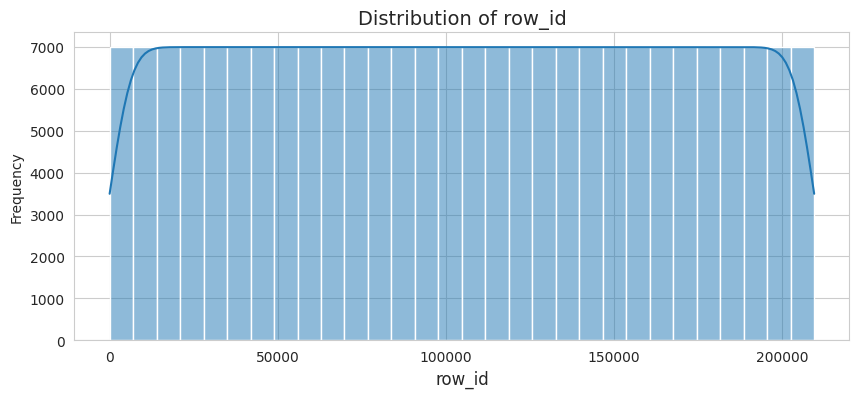

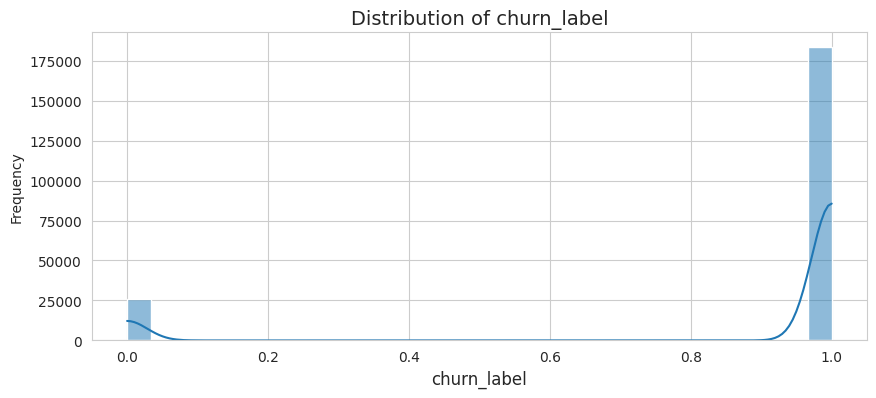

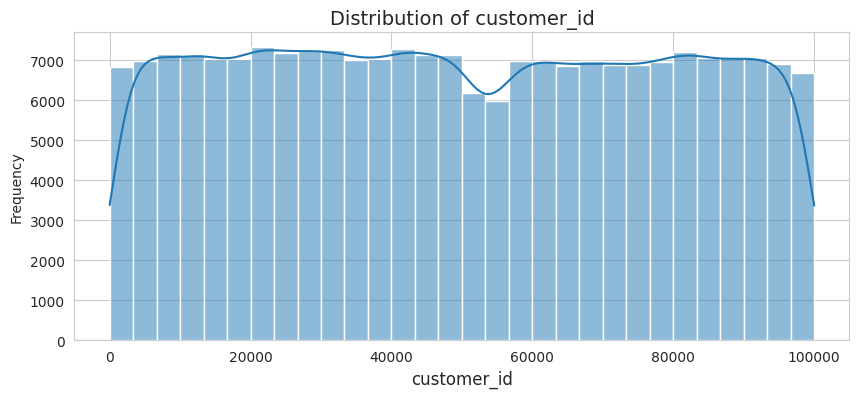

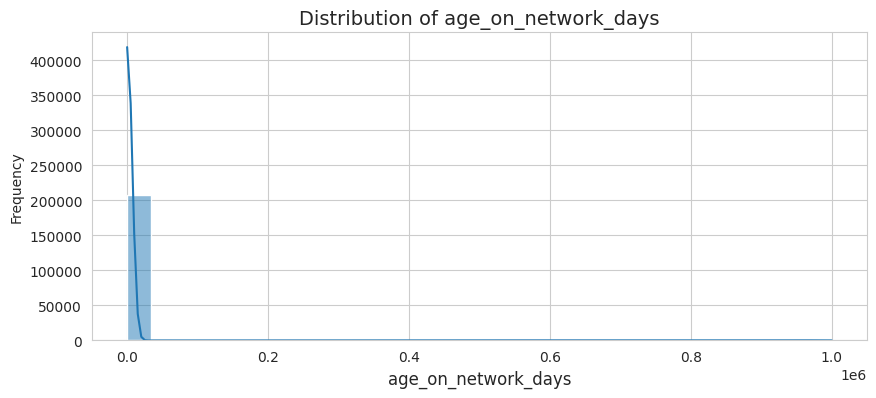

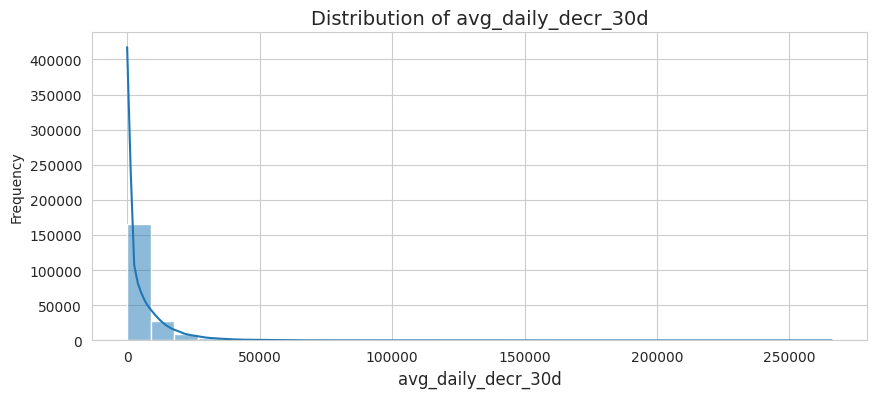

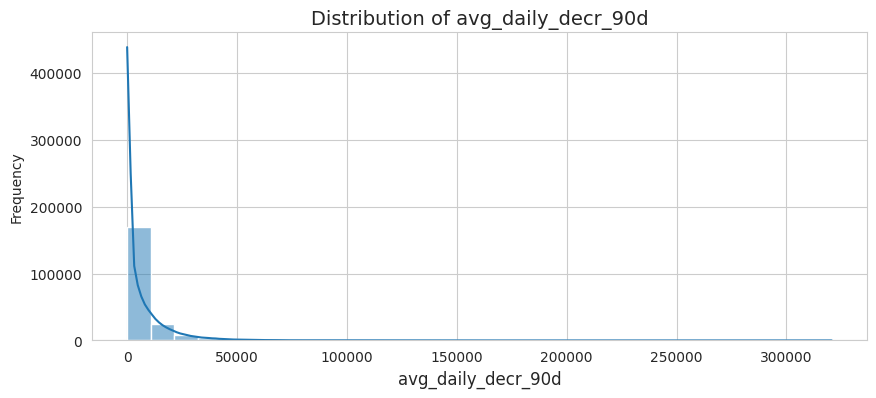

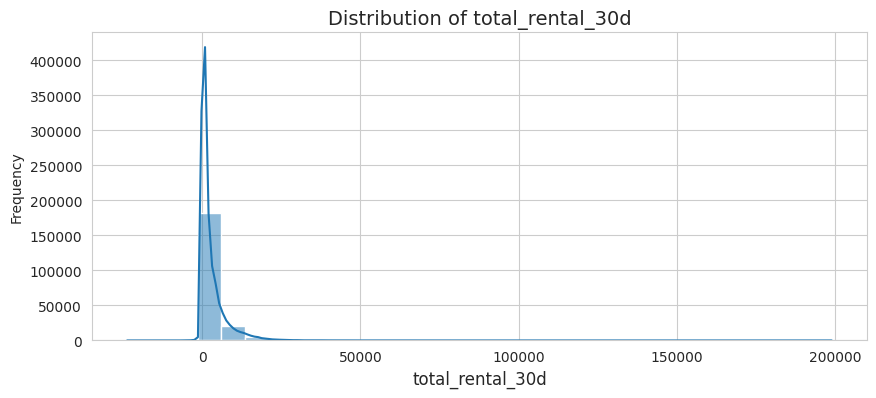

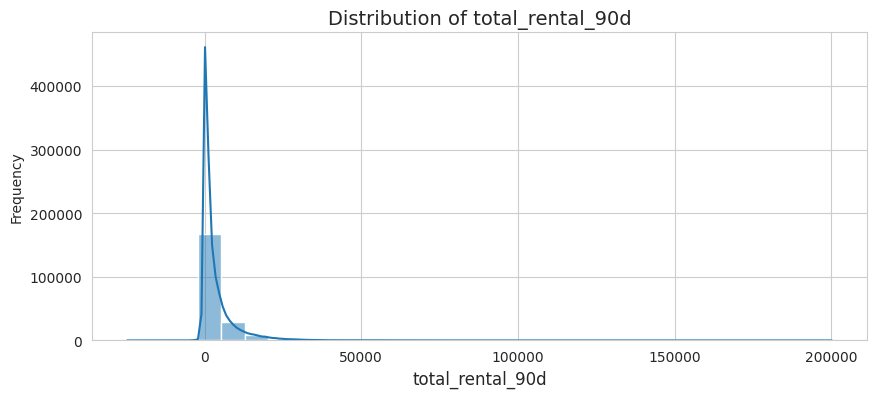

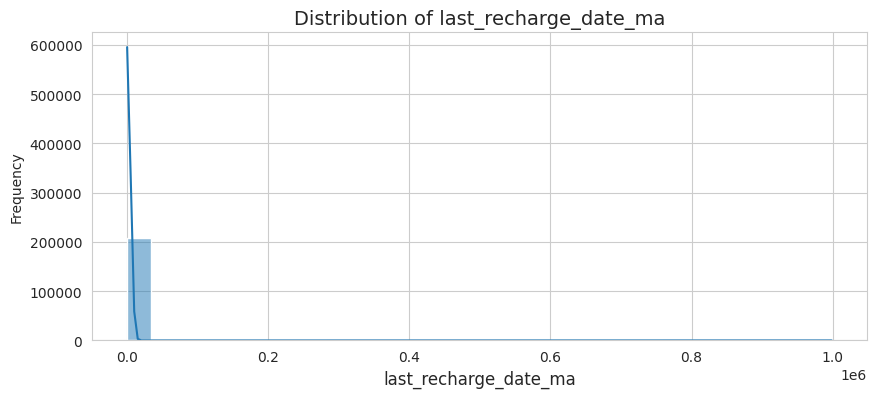

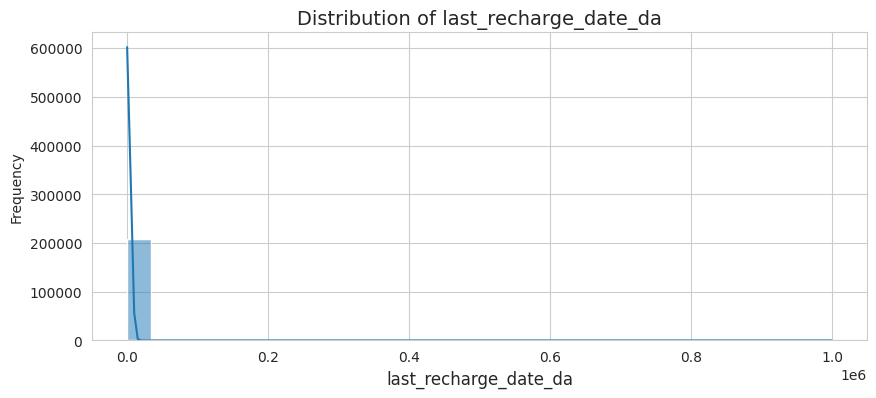

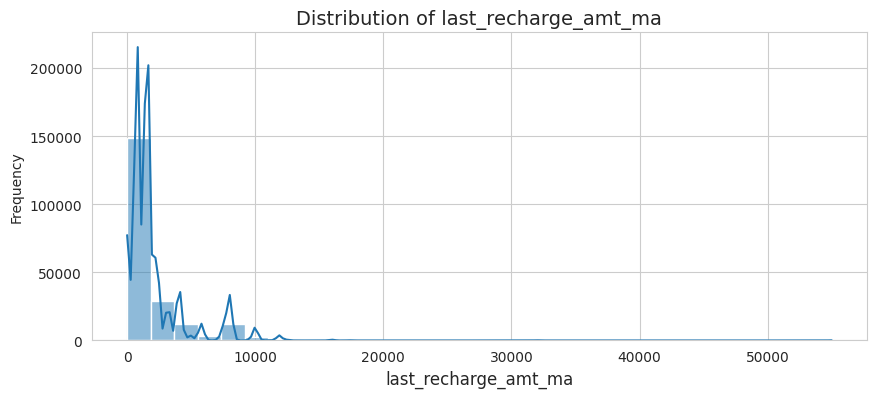

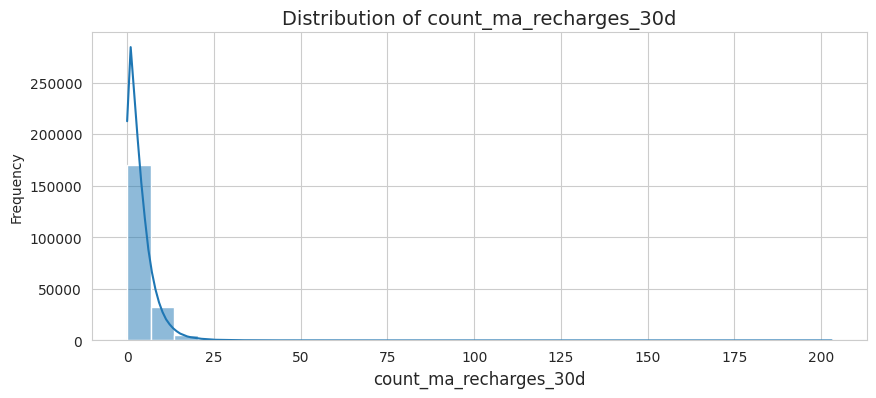

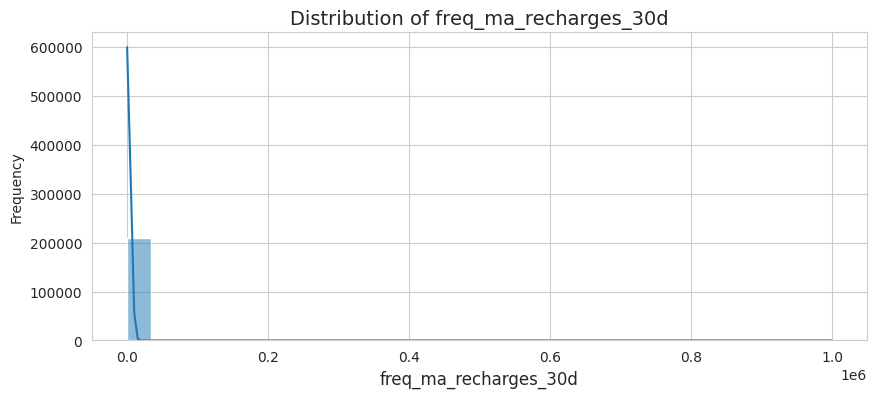

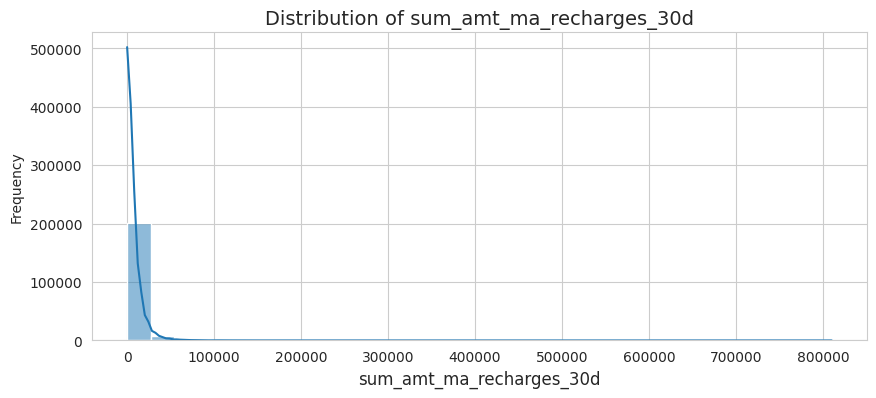

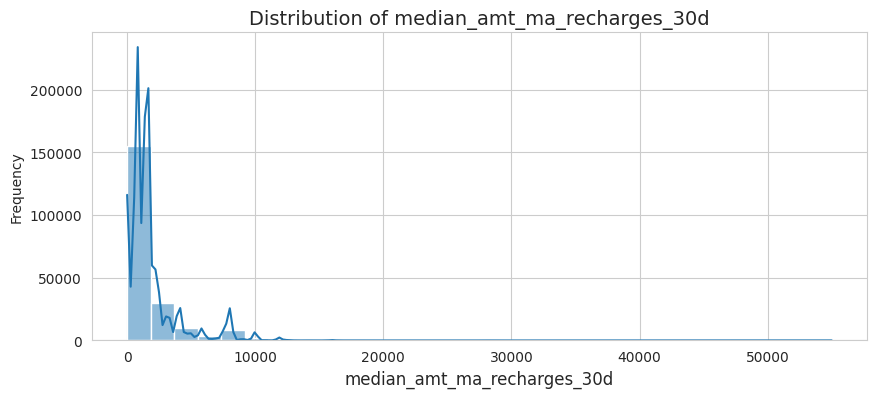

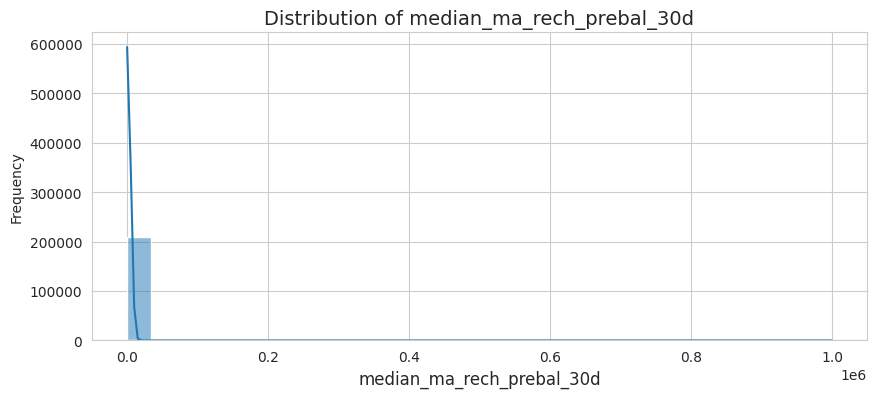

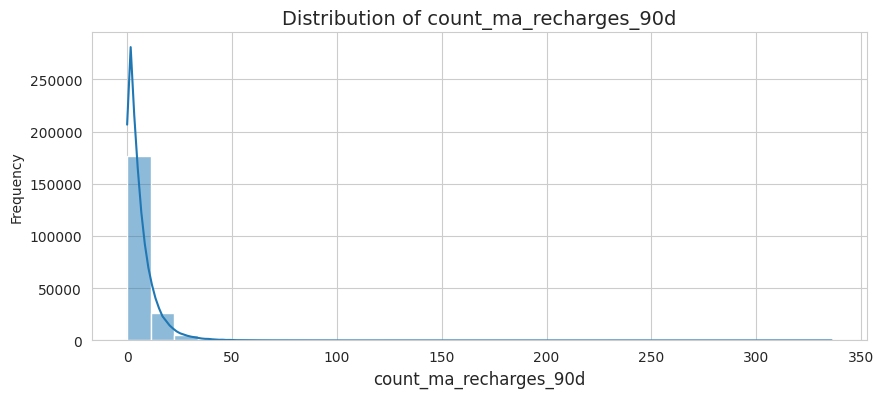

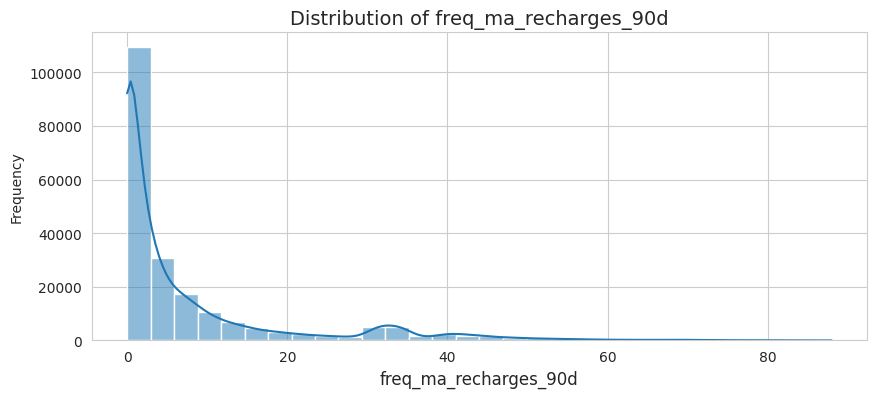

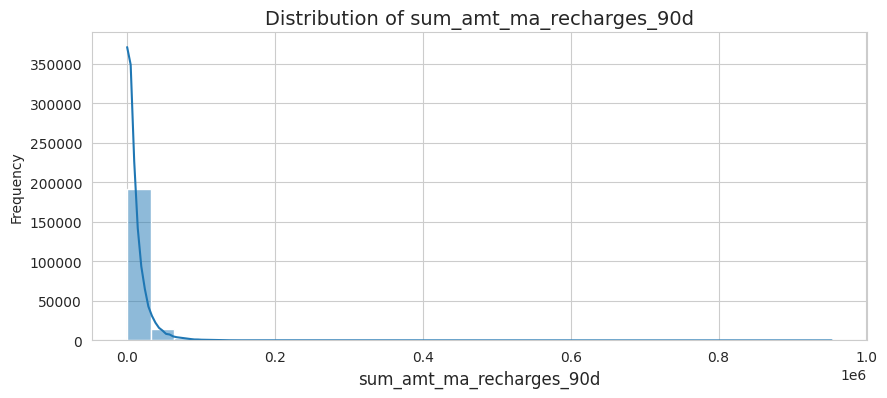

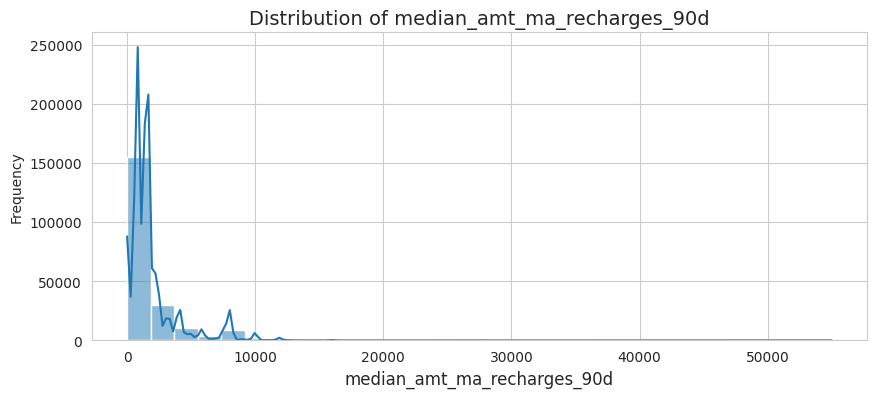

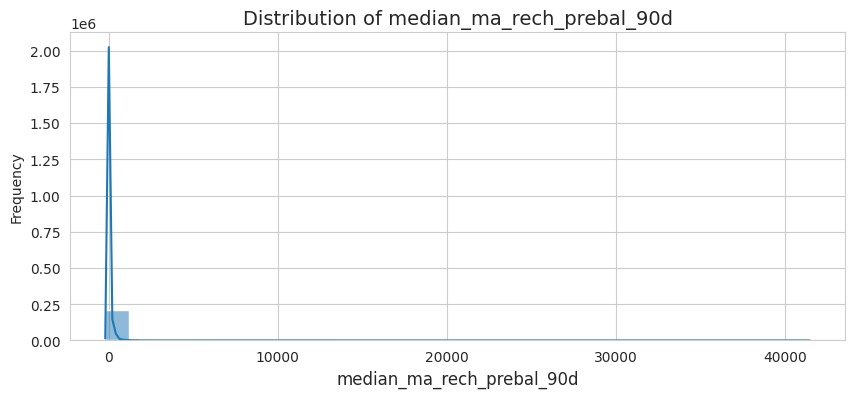

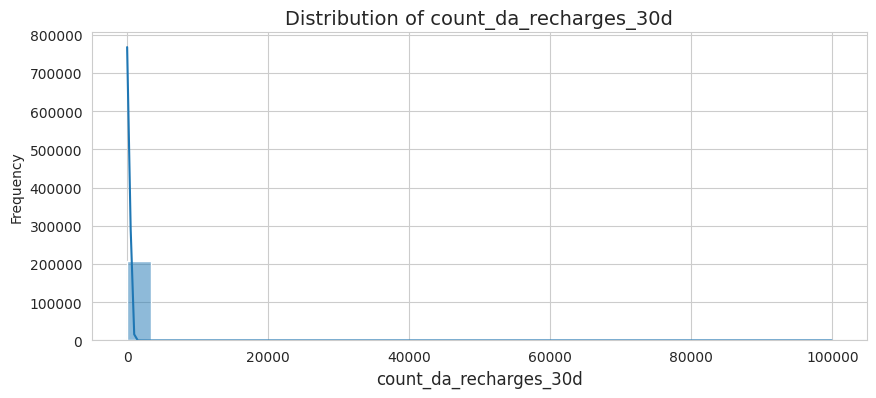

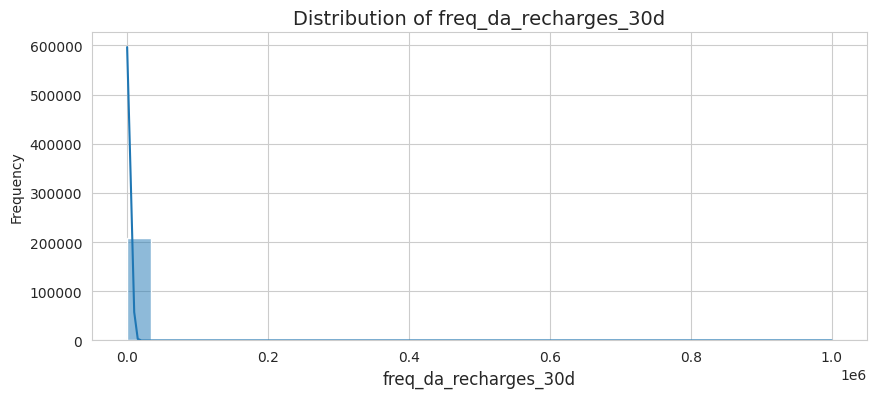

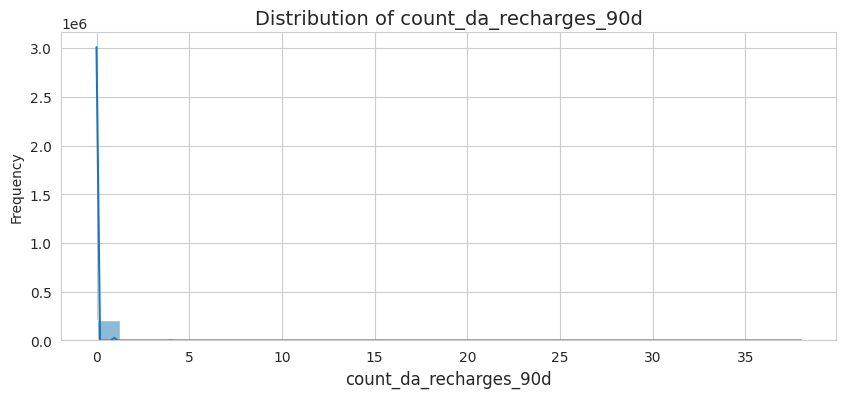

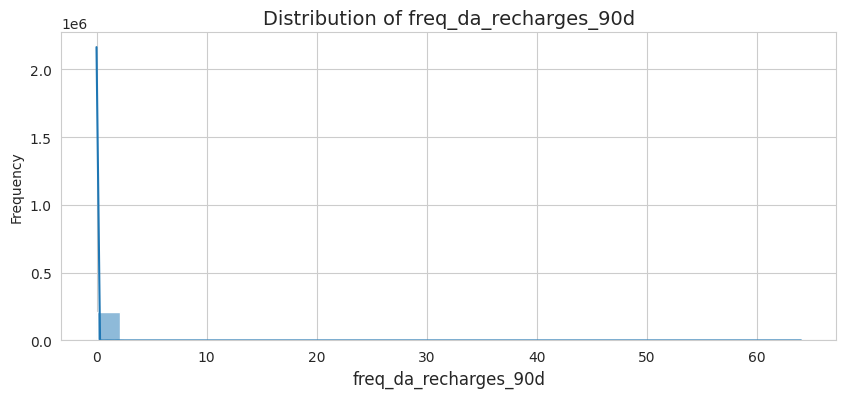

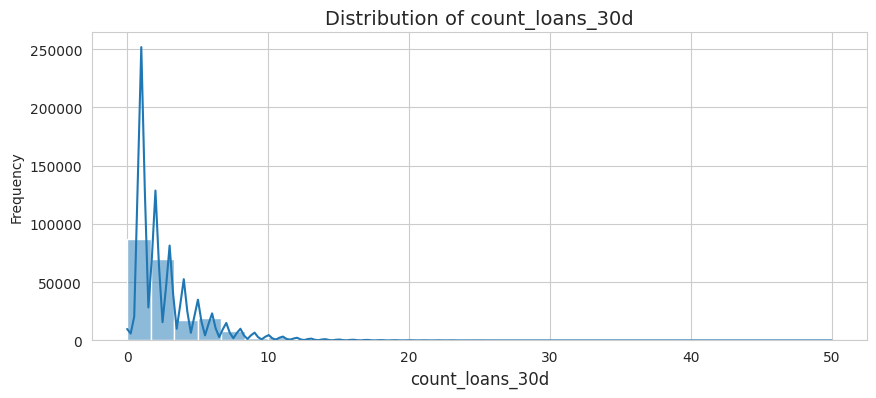

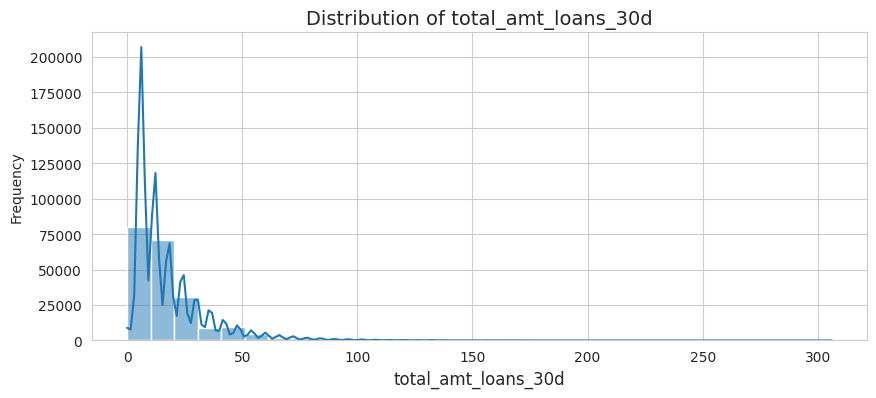

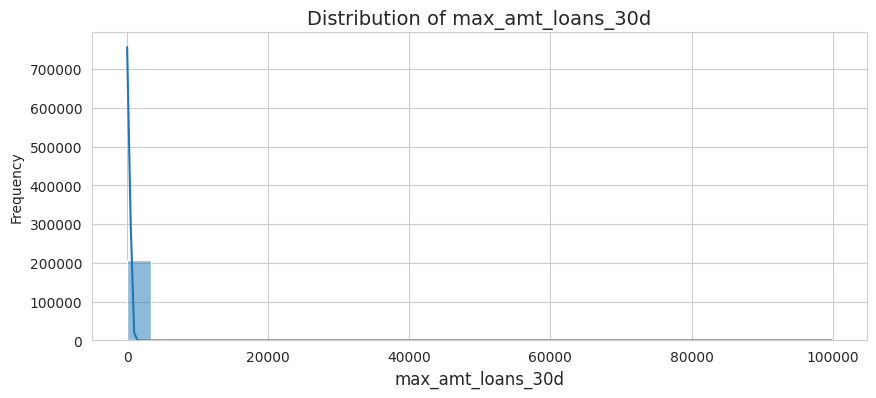

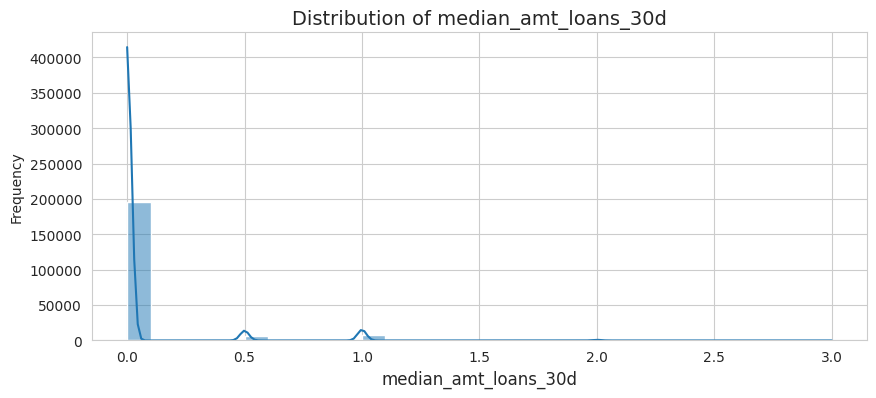

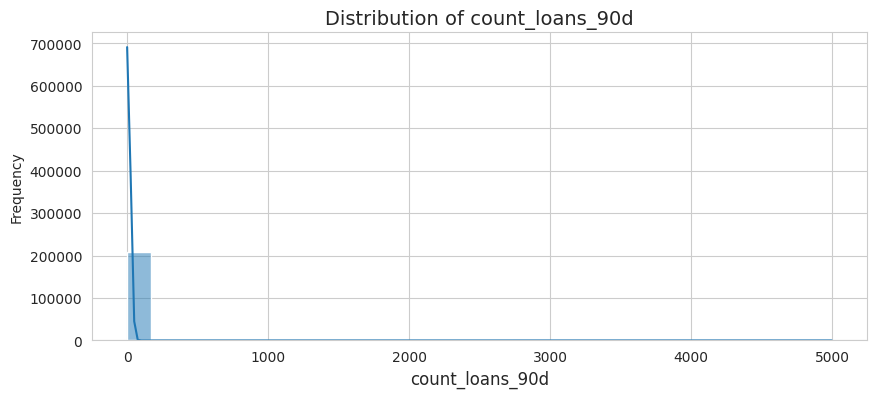

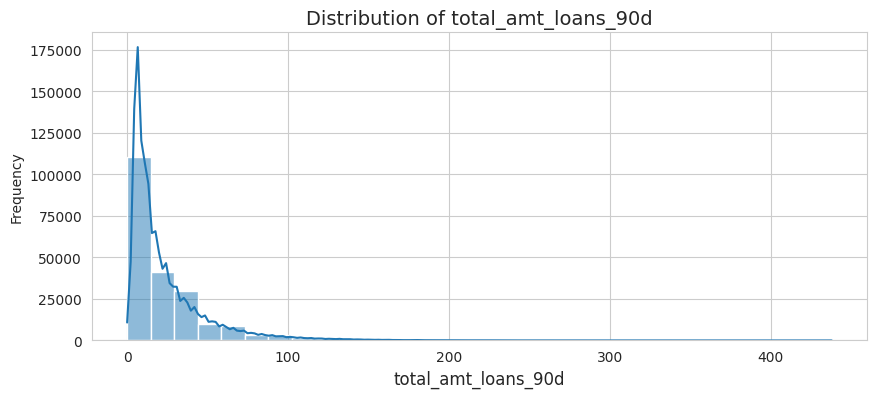

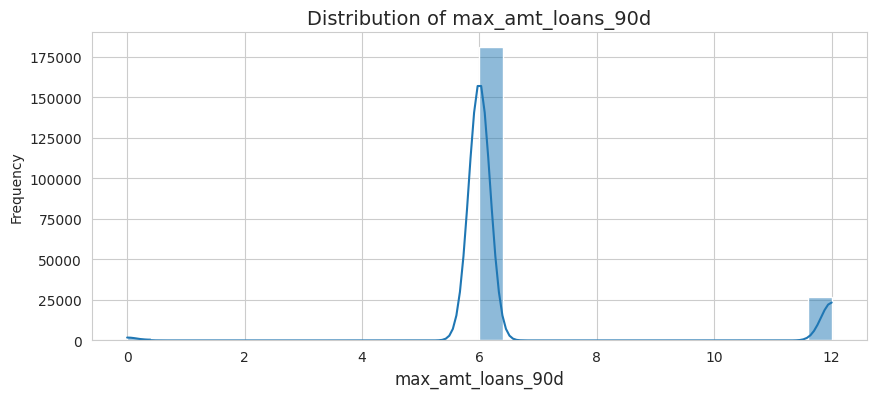

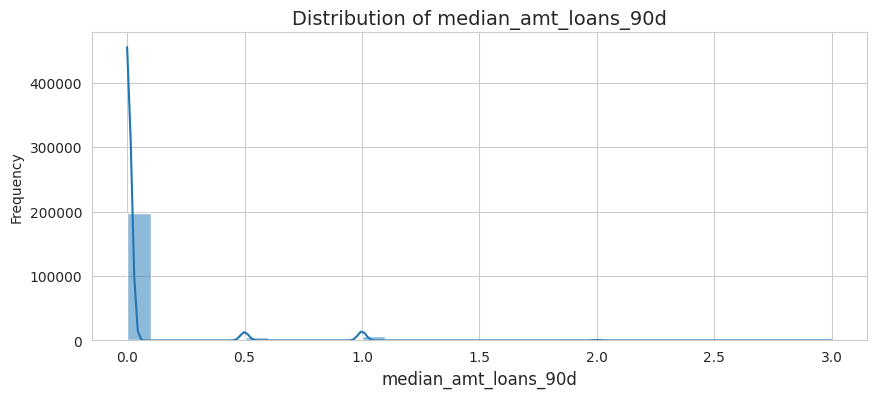

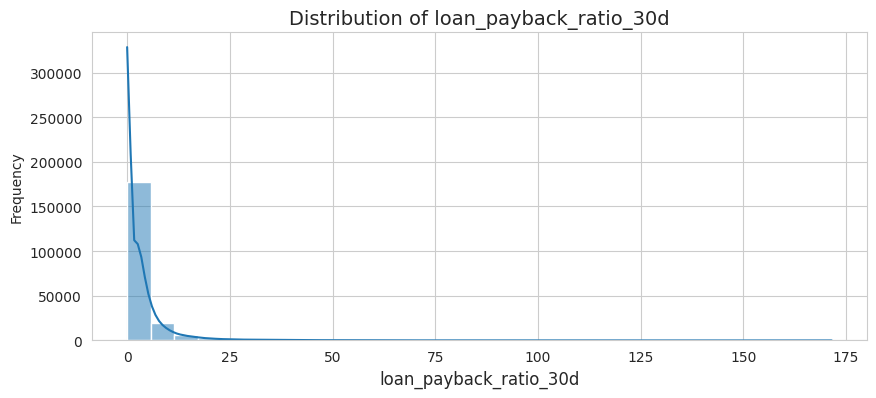

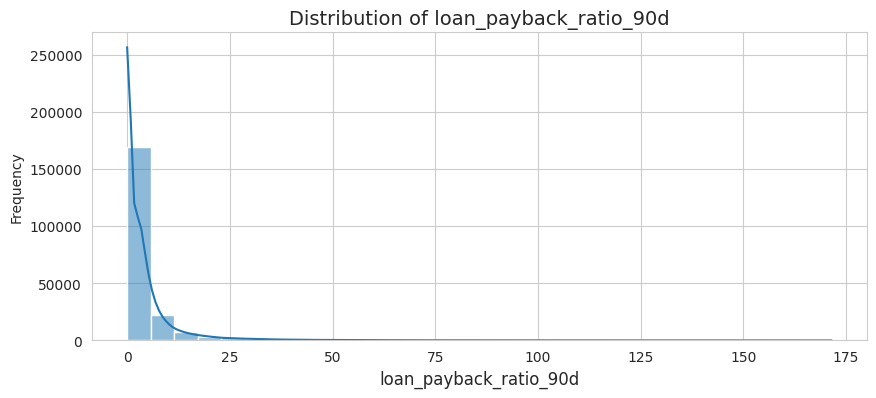

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i, col in enumerate(df_copy.columns[:35], start=1):
    plt.figure(figsize=(10,4))
    sns.histplot(df_copy[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency")
    plt.show()


<Axes: xlabel='churn_label', ylabel='total_rental_30d'>

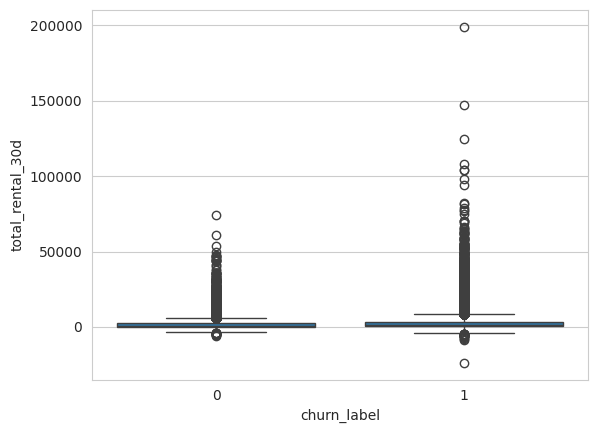

In [ ]:
sns.boxplot(x="churn_label", y="total_rental_30d", data=df_copy)

In [ ]:
df_copy.skew()

row_id                          0.000000
churn_label                    -2.270254
customer_id                     0.018124
age_on_network_days            10.392949
avg_daily_decr_30d              3.946230
avg_daily_decr_90d              4.252565
total_rental_30d                4.521929
total_rental_90d                4.437681
last_recharge_date_ma          14.790974
last_recharge_date_da          14.814857
last_recharge_amt_ma            3.781149
count_ma_recharges_30d          3.283842
freq_ma_recharges_30d          14.772833
sum_amt_ma_recharges_30d        6.386787
median_amt_ma_recharges_30d     3.512324
median_ma_rech_prebal_30d      14.779875
count_ma_recharges_90d          3.425254
freq_ma_recharges_90d           2.285423
sum_amt_ma_recharges_90d        4.897950
median_amt_ma_recharges_90d     3.752706
median_ma_rech_prebal_90d      44.880503
count_da_recharges_30d         17.818364
freq_da_recharges_30d          14.776430
count_da_recharges_90d         27.267278
freq_da_recharges_90d          28.988083
count_loans_30d                 2.713421
total_amt_loans_30d             2.975719
max_amt_loans_30d              17.658052
median_amt_loans_30d            4.551043
count_loans_90d                16.594408
total_amt_loans_90d             3.150006
max_amt_loans_90d               1.678304
median_amt_loans_90d            4.895720
loan_payback_ratio_30d          8.310695
loan_payback_ratio_90d          6.899951
customer_circle                 0.000000
record_date                     0.116409
dtype: float64

# it is highly skewed multitiple feature

In [ ]:
skewed_features = [
    "avg_daily_decr_30d",
    "avg_daily_decr_90d",
    "total_rental_30d",
    "total_rental_90d",
    "last_recharge_amt_ma",
    "count_ma_recharges_30d",
    "sum_amt_ma_recharges_30d",
    "count_ma_recharges_90d",
    "sum_amt_ma_recharges_90d",
    "count_loans_30d",
    "total_amt_loans_30d",
    "max_amt_loans_30d",
    "count_loans_90d",
    "freq_da_recharges_30d",
    "total_amt_loans_90d",
    "max_amt_loans_90d",
    "loan_payback_ratio_30d",
    "loan_payback_ratio_90d",
    "last_recharge_date_ma",
    "last_recharge_date_da",
    "count_da_recharges_30d",
    "count_da_recharges_90d",
    "freq_ma_recharges_30d",
    "freq_da_recharges_30d"
]

In [ ]:
df_copy[skewed_features].describe()


avg_daily_decr_30d  avg_daily_decr_90d  total_rental_30d  \
count       209593.000000       209593.000000     209593.000000   
mean          5381.402289         6082.515068       2692.581910   
std           9220.623400        10918.812767       4308.586781   
min            -93.012667          -93.012667     -23737.140000   
25%             42.440000           42.692000        280.420000   
50%           1469.175667         1500.000000       1083.570000   
75%           7244.000000         7802.790000       3356.940000   
max         265926.000000       320630.000000     198926.110000   

       total_rental_90d  last_recharge_amt_ma  count_ma_recharges_30d  \
count     209593.000000         209593.000000           209593.000000   
mean        3483.406534           2064.452797                3.978057   
std         5770.461279           2370.786034                4.256090   
min       -24720.580000              0.000000                0.000000   
25%          300.260000            770.000000                1.000000   
50%         1334.000000           1539.000000                3.000000   
75%         4201.790000           2309.000000                5.000000   
max       200148.110000          55000.000000              203.000000   

       sum_amt_ma_recharges_30d  count_ma_recharges_90d  \
count             209593.000000            209593.00000   
mean                7704.501157                 6.31543   
std                10139.621714                 7.19347   
min                    0.000000                 0.00000   
25%                 1540.000000                 2.00000   
50%                 4628.000000                 4.00000   
75%                10010.000000                 8.00000   
max               810096.000000               336.00000   

       sum_amt_ma_recharges_90d  count_loans_30d  total_amt_loans_30d  \
count             209593.000000    209593.000000        209593.000000   
mean               12396.218352         2.758981            17.952021   
std                16857.793882         2.554502            17.379741   
min                    0.000000         0.000000             0.000000   
25%                 2317.000000         1.000000             6.000000   
50%                 7226.000000         2.000000            12.000000   
75%                16000.000000         4.000000            24.000000   
max               953036.000000        50.000000           306.000000   

       max_amt_loans_30d  count_loans_90d  freq_da_recharges_30d  \
count      209593.000000    209593.000000          209593.000000   
mean          274.658747        18.520919            3749.494447   
std          4245.264648       224.797423           53885.414979   
min             0.000000         0.000000               0.000000   
25%             6.000000         1.000000               0.000000   
50%             6.000000         2.000000               0.000000   
75%             6.000000         5.000000               0.000000   
max         99864.560860      4997.517944          999809.240100   

       total_amt_loans_90d  max_amt_loans_90d  loan_payback_ratio_30d  \
count        209593.000000      209593.000000           209593.000000   
mean             23.645398           6.703134                3.398826   
std              26.469861           2.103864                8.813729   
min               0.000000           0.000000                0.000000   
25%               6.000000           6.000000                0.000000   
50%              12.000000           6.000000                0.000000   
75%              30.000000           6.000000                3.750000   
max             438.000000          12.000000              171.500000   

       loan_payback_ratio_90d  last_recharge_date_ma  last_recharge_date_da  \
count           209593.000000           209593.00000          209593.000000   
mean                 4.321485             3755.84780            3712.202921   
std                 10.308108            53905.

In [ ]:
#sns.pairplot(df[:5])
#plt.show()

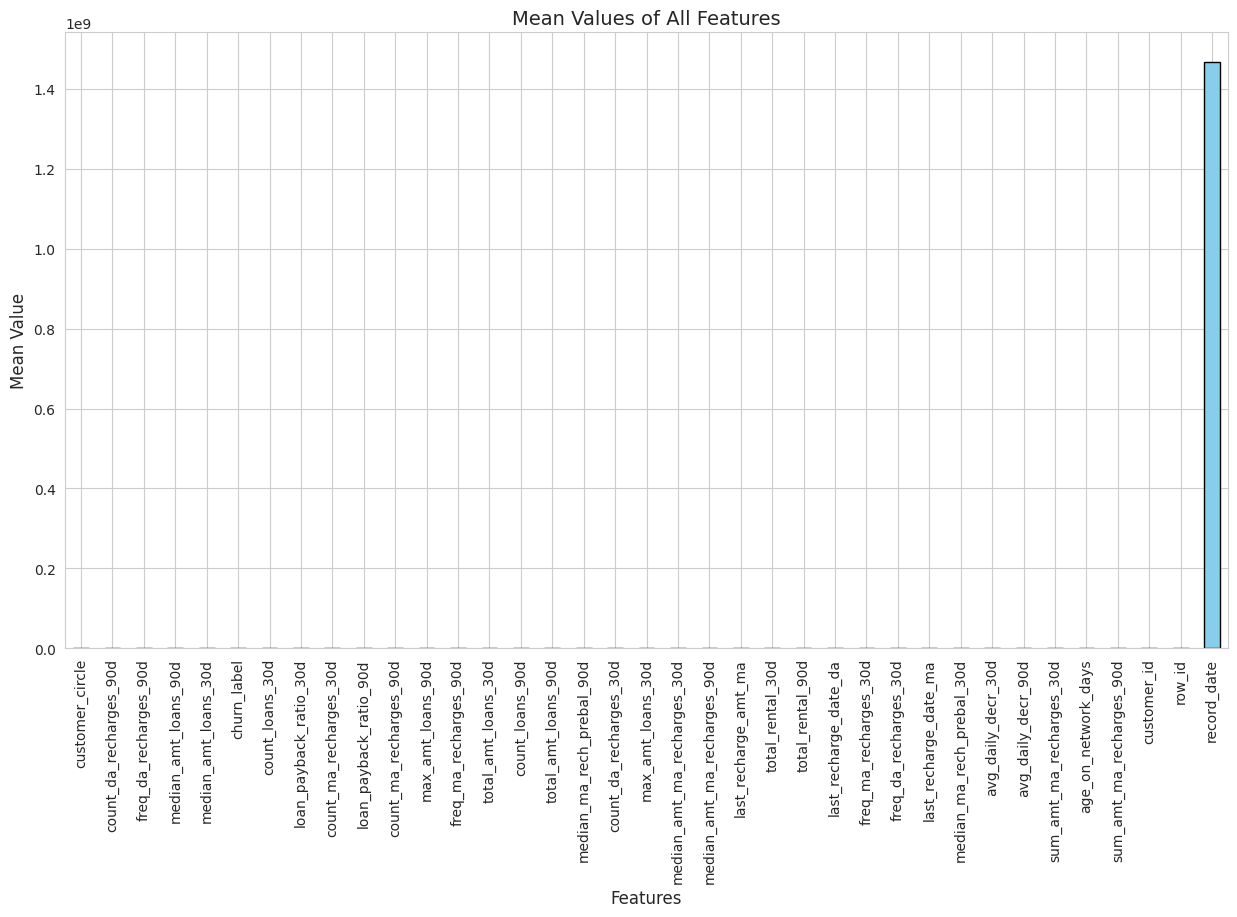

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
df_copy.mean().sort_values().plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Mean Values of All Features", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.xticks(rotation=90)
plt.show()


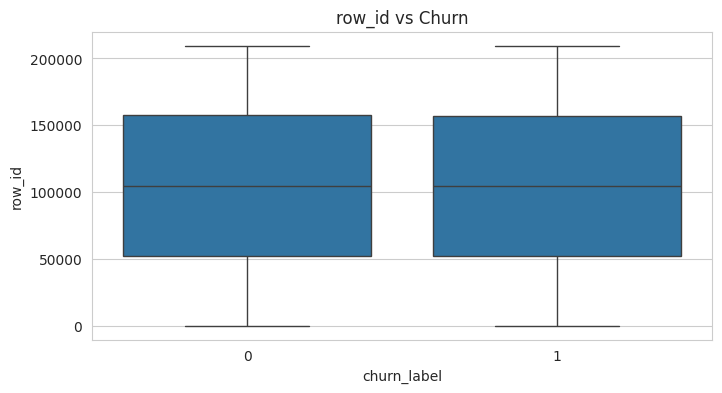

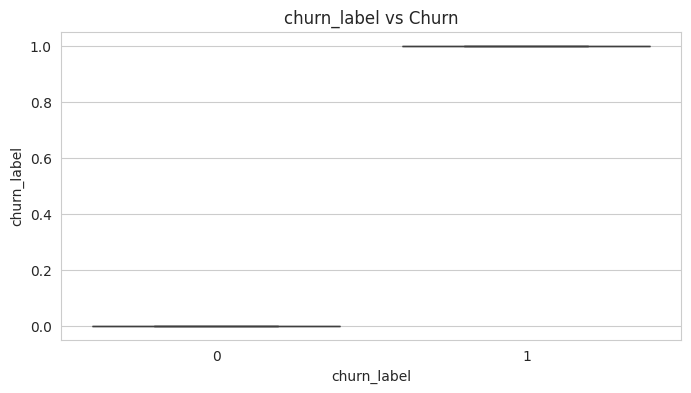

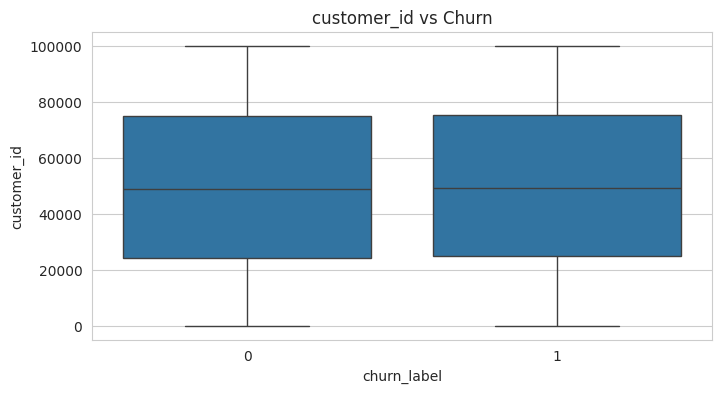

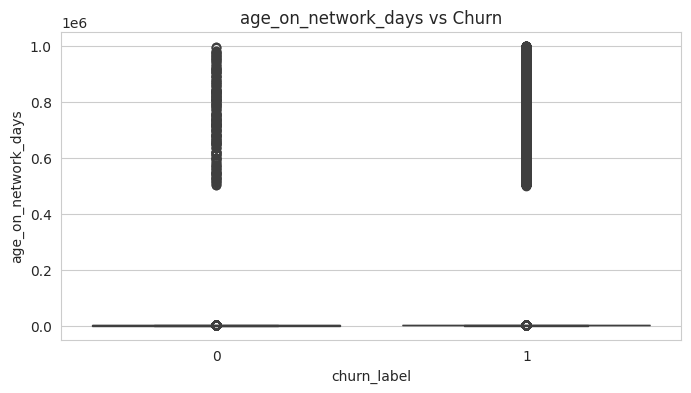

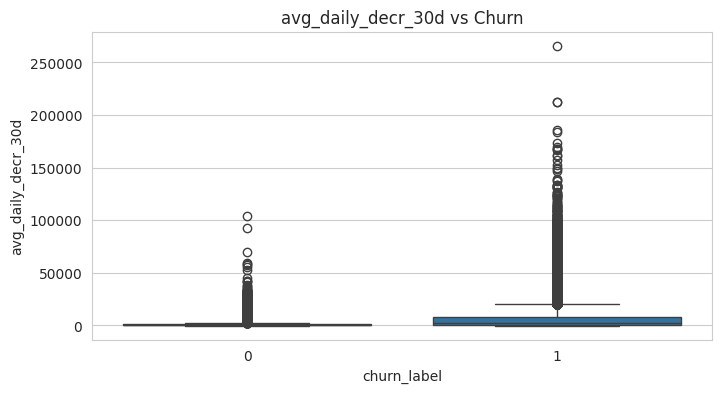

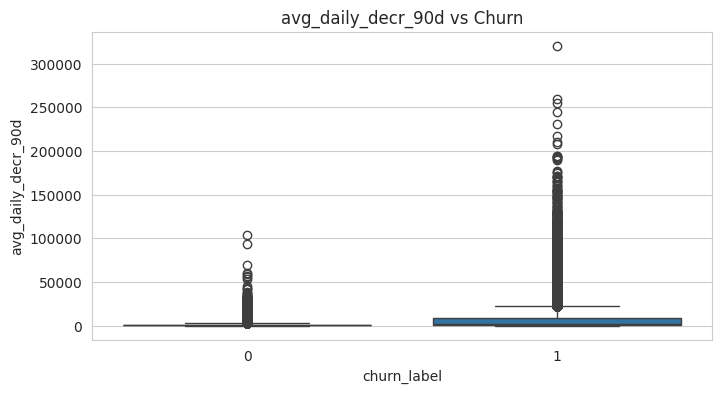

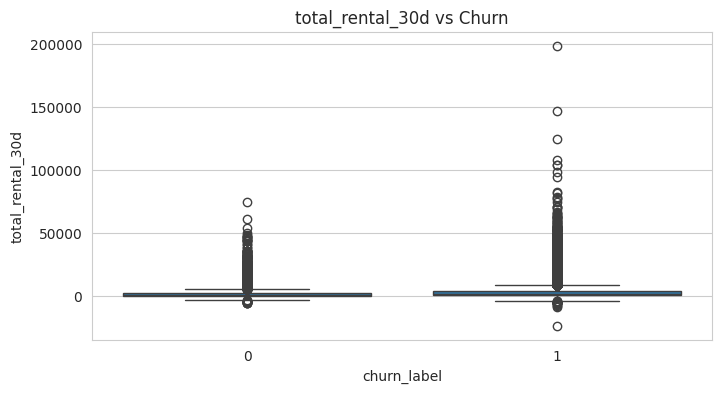

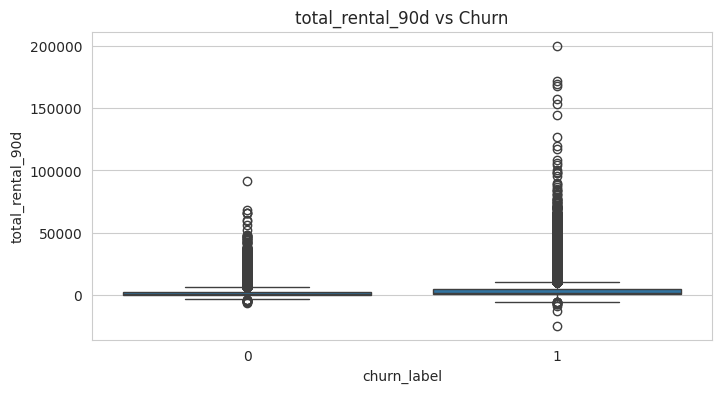

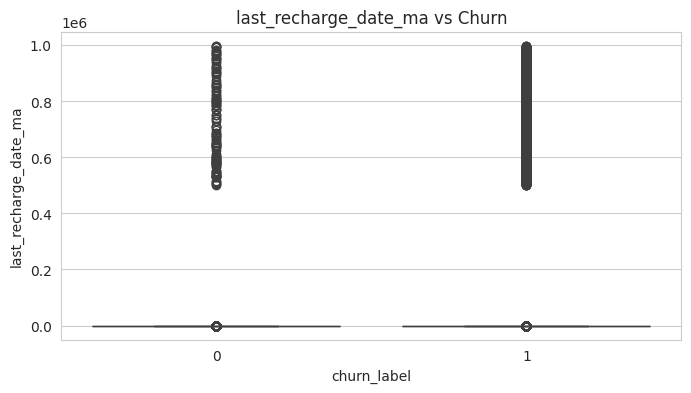

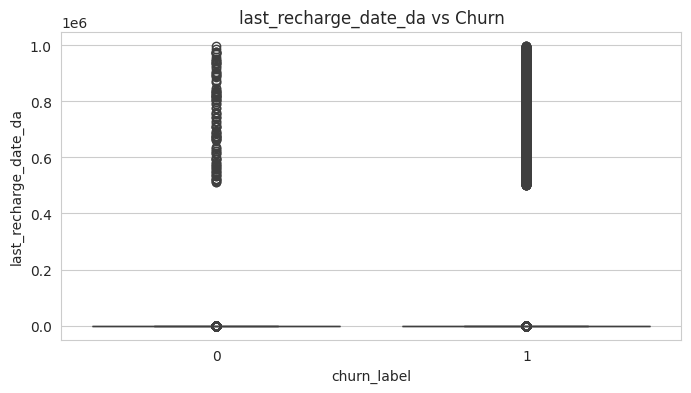

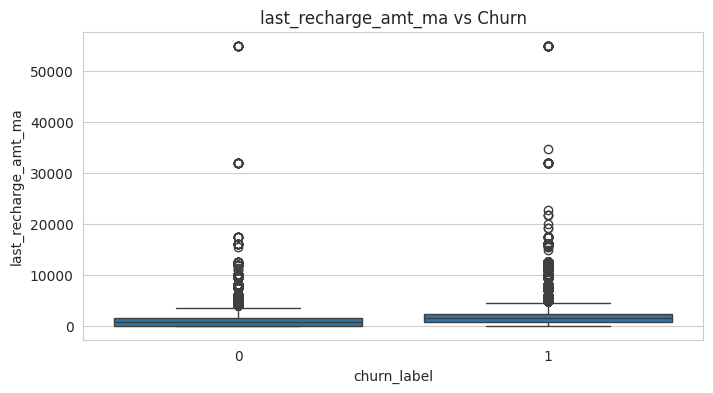

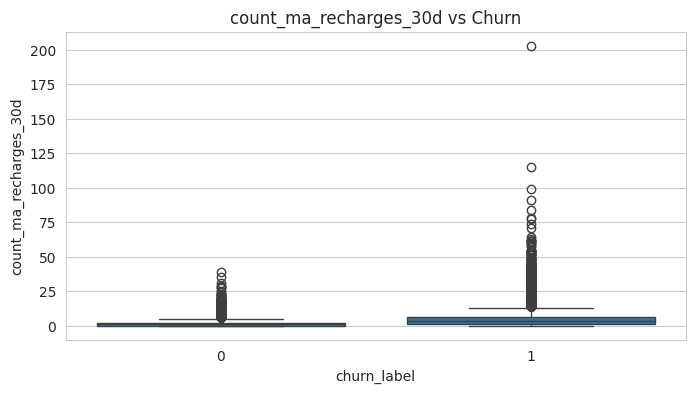

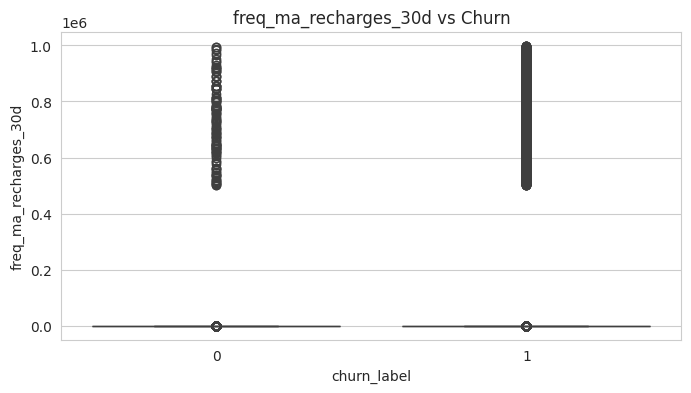

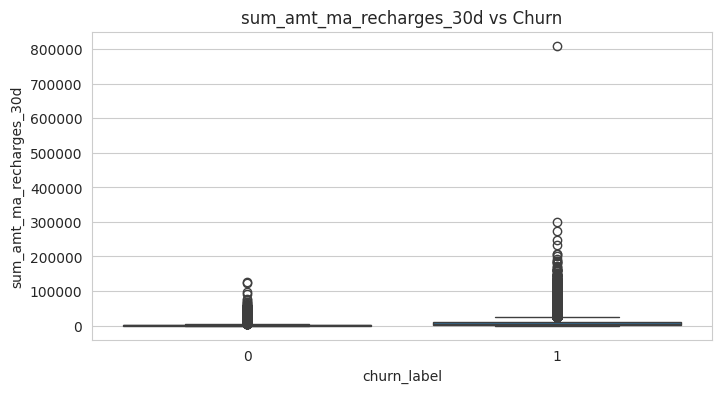

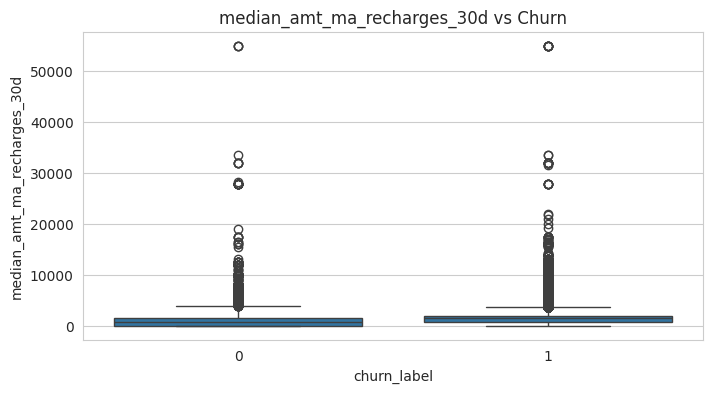

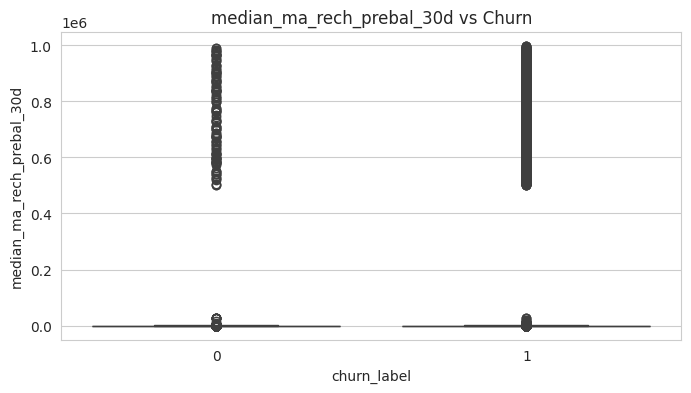

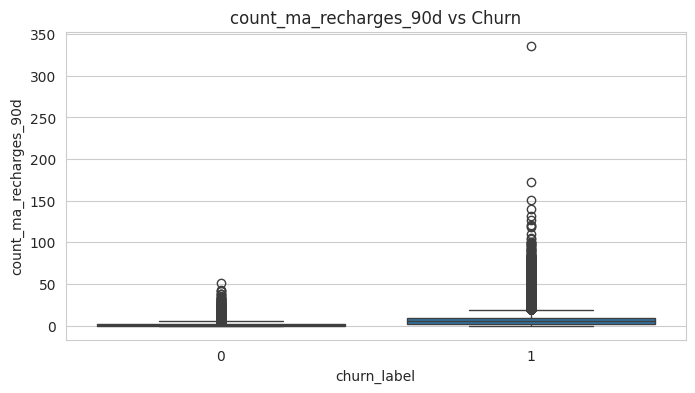

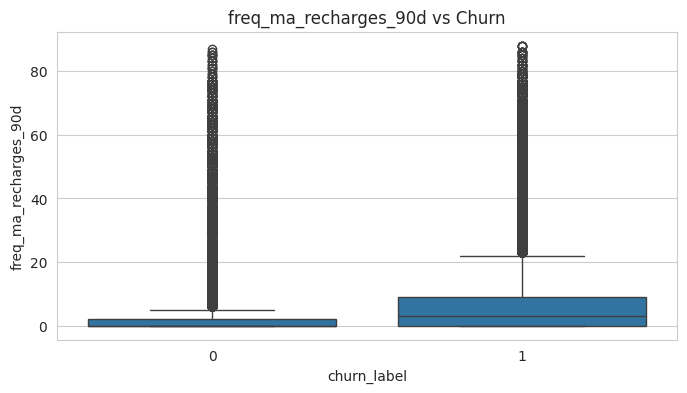

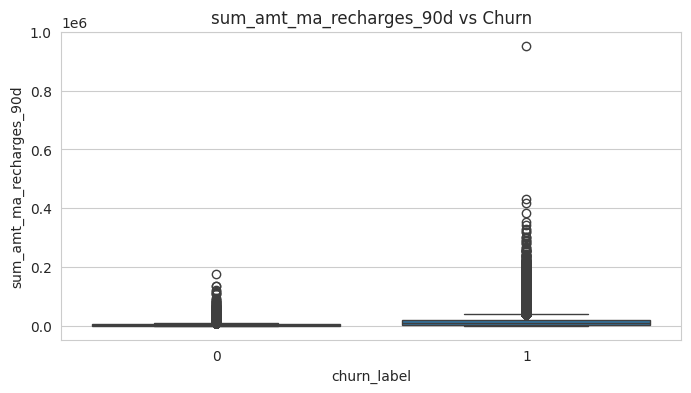

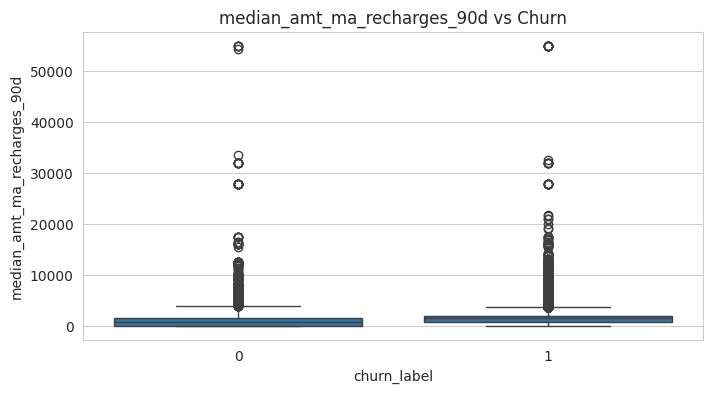

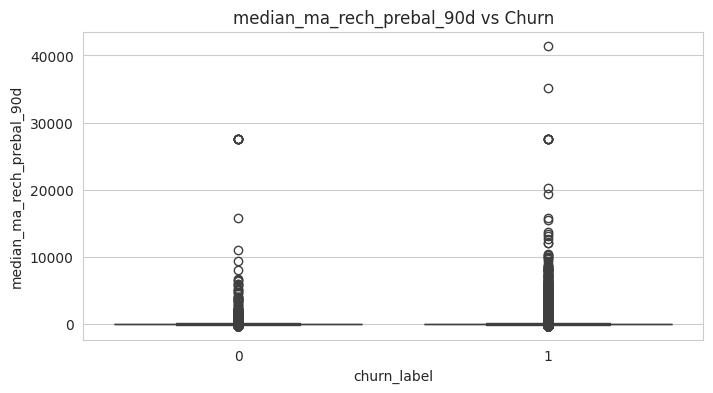

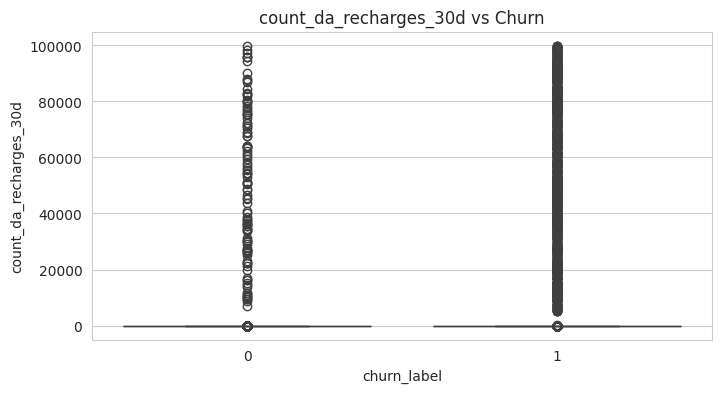

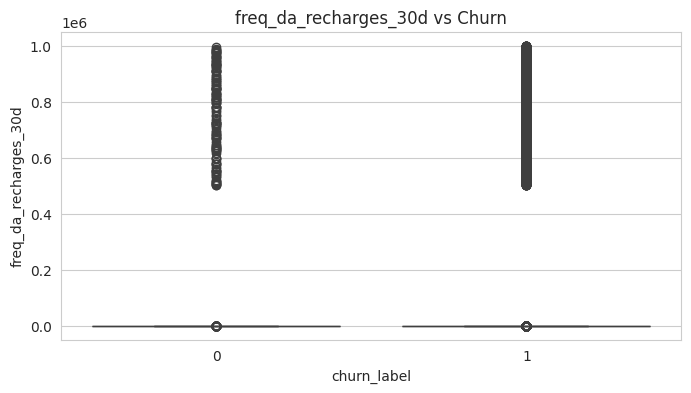

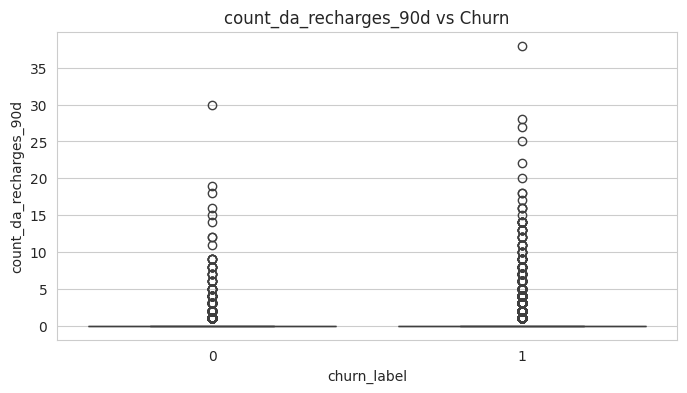

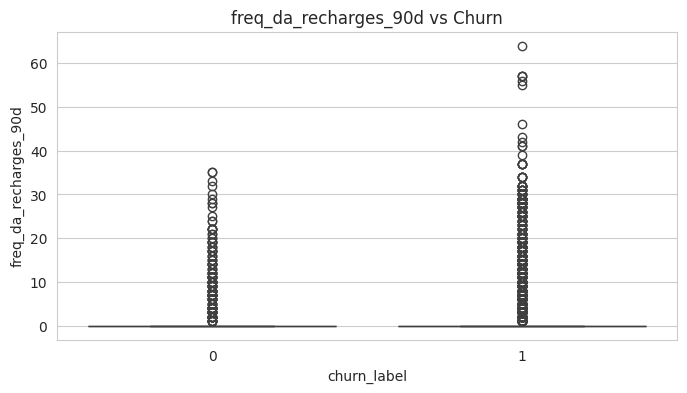

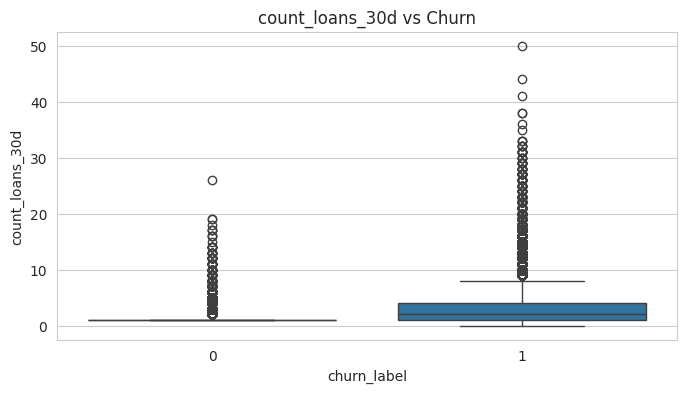

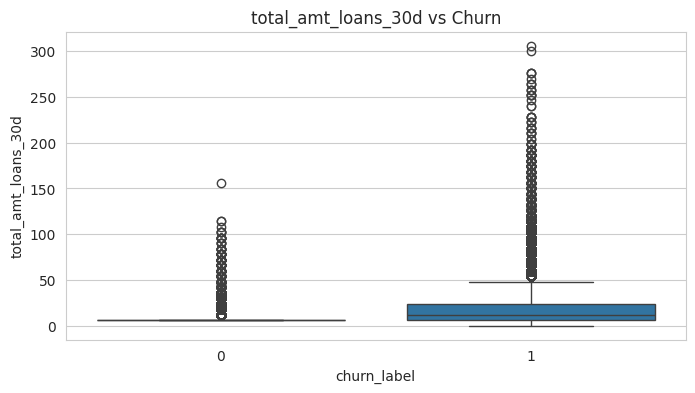

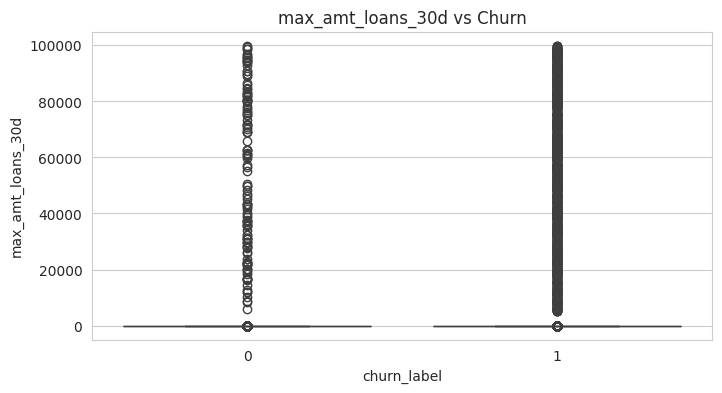

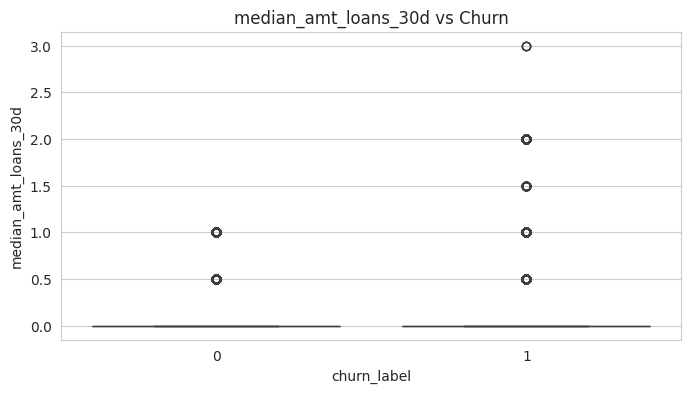

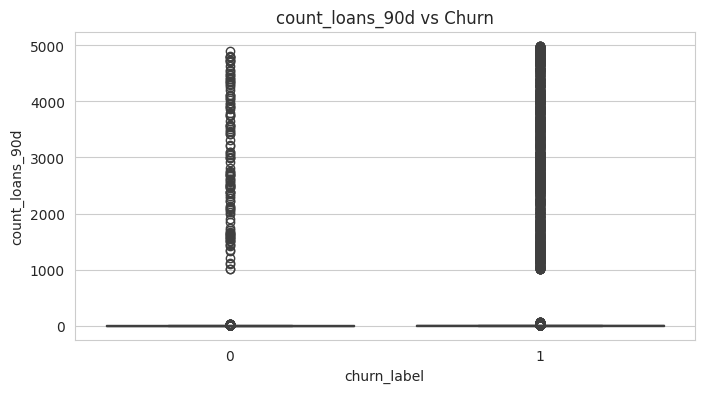

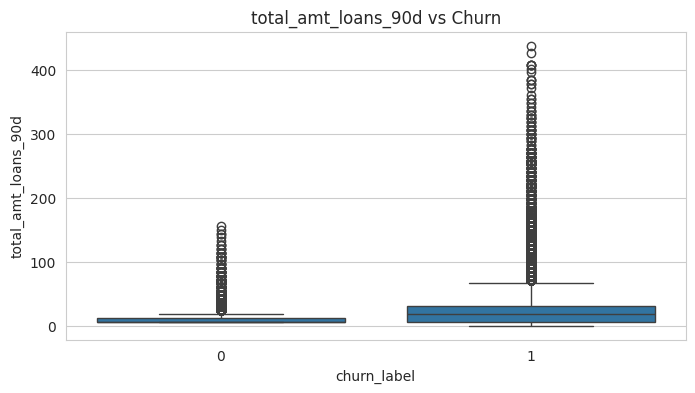

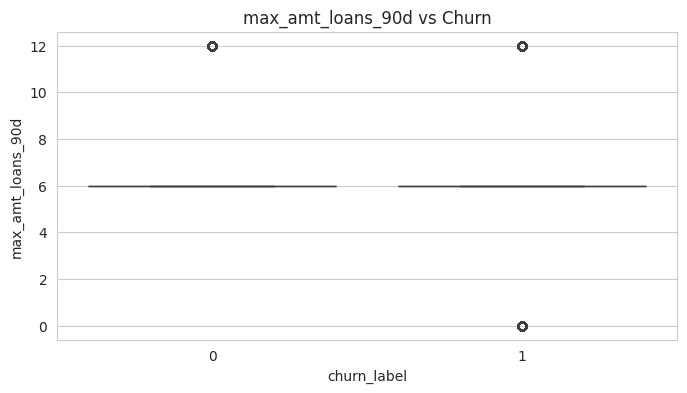

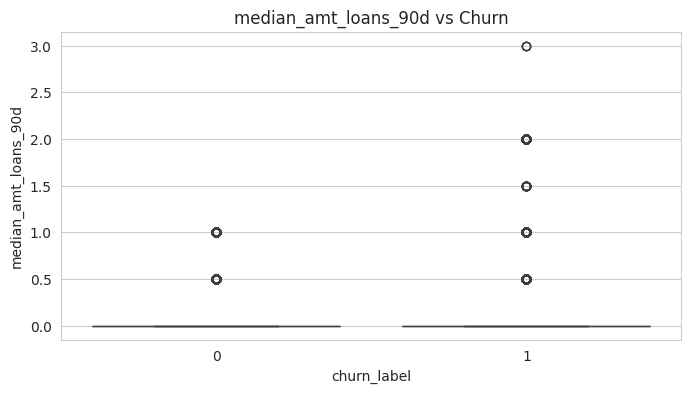

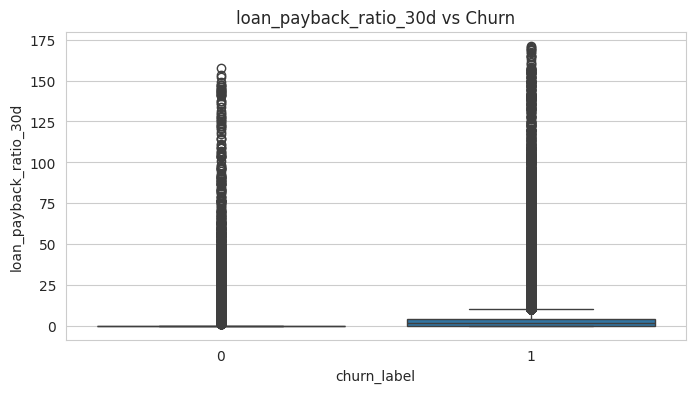

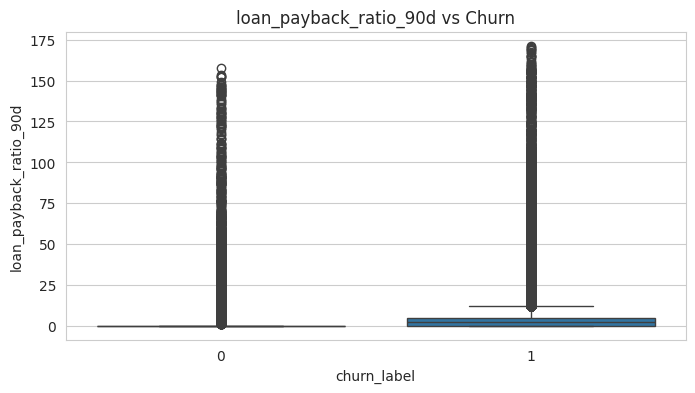

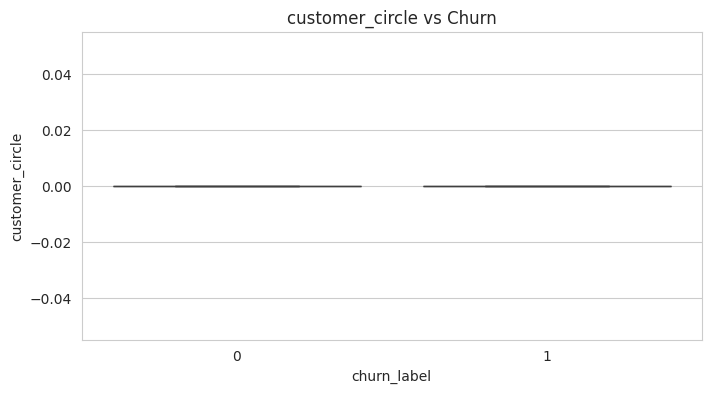

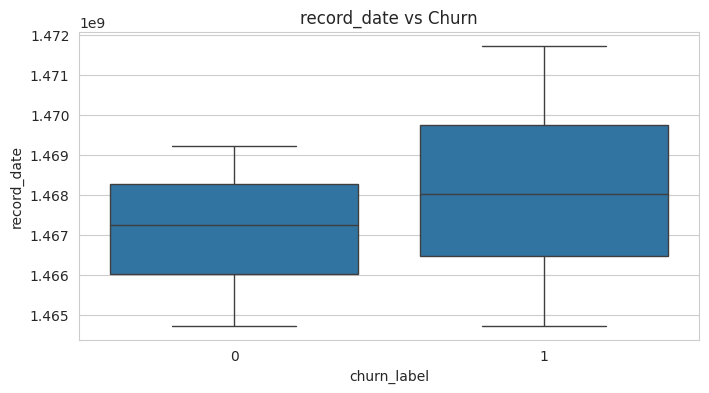

In [ ]:
for col in df_copy[:20]:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="churn_label", y=col, data=df_copy)
    plt.title(f"{col} vs Churn")
    plt.show()

In [ ]:
abs(df_copy.corr())

row_id  churn_label  customer_id  \
row_id                       1.000000     0.000403     0.000136   
churn_label                  0.000403     1.000000     0.001945   
customer_id                  0.000136     0.001945     1.000000   
age_on_network_days          0.002048     0.003785     0.000555   
avg_daily_decr_30d           0.002739     0.168298     0.000669   
avg_daily_decr_90d           0.003077     0.166150     0.000903   
total_rental_30d             0.003906     0.058085     0.001437   
total_rental_90d             0.003459     0.075521     0.000728   
last_recharge_date_ma        0.001853     0.003728     0.000949   
last_recharge_date_da        0.001133     0.001711     0.001404   
last_recharge_amt_ma         0.001064     0.131804     0.002356   
count_ma_recharges_30d       0.003320     0.237331     0.000585   
freq_ma_recharges_30d        0.003181     0.001330     0.001812   
sum_amt_ma_recharges_30d     0.000123     0.202828     0.001074   
median_amt_ma_recharges_30d  0.001371     0.141490     0.000669   
median_ma_rech_prebal_30d    0.001258     0.004829     0.000253   
count_ma_recharges_90d       0.002329     0.236392     0.001919   
freq_ma_recharges_90d        0.000249     0.084385     0.004409   
sum_amt_ma_recharges_90d     0.000523     0.205793     0.000974   
median_amt_ma_recharges_90d  0.000298     0.120855     0.000621   
median_ma_rech_prebal_90d    0.001947     0.039300     0.000574   
count_da_recharges_30d       0.000888     0.003827     0.001739   
freq_da_recharges_30d        0.002504     0.000027     0.000274   
count_da_recharges_90d       0.001324     0.002999     0.004556   
freq_da_recharges_90d        0.002827     0.005418     0.002249   
count_loans_30d              0.001725     0.196283     0.001735   
total_amt_loans_30d          0.002387     0.197272     0.002138   
max_amt_loans_30d            0.000698     0.000248     0.000761   
median_amt_loans_30d         0.002005     0.044589     0.000988   
count_loans_90d              0.002241     0.004733     0.001908   
total_amt_loans_90d          0.000781     0.199788     0.000222   
max_amt_loans_90d            0.001742     0.084144     0.003282   
median_amt_loans_90d         0.002615     0.035747     0.001213   
loan_payback_ratio_30d       0.000040     0.048336     0.002907   
loan_payback_ratio_90d       0.002411     0.049183     0.002655   
customer_circle                   NaN          NaN          NaN   
record_date                  0.002509     0.162687     0.002111   

                             age_on_network_days  avg_daily_decr_30d  \
row_id                                  0.002048            0.002739   
churn_label                             0.003785            0.168298   
customer_id                             0.000555            0.000669   
age_on_network_days                     1.000000            0.001104   
avg_daily_decr_30d                      0.001104            1.000000   
avg_daily_decr_90d                      0.000374            0.977704   
total_rental_30d                        0.000960            0.442066   
total_rental_90d                        0.000790            0.458977   
last_recharge_date_ma                   0.001692            0.000487   
last_recharge_date_da                   0.001693            0.001636   
last_recharge_amt_ma                    0.004256            0.275837   
count_ma_recharges_30d                  0.003148            0.451385   
freq_ma_recharges_30d                   0.001163            0.000577   
sum_amt_ma_recharges_30d                0.000707            0.636536   
median_amt_ma_recharges_30d             0.004306            0.295356   
median_ma_rech_prebal_30d               0.003930            0.001153   
count_ma_recharges_90d                  0.002725            0.587338   
freq_ma_recharges_90d                   0.004401            0.078299   
sum_amt_ma_recharges_90d                0.001011            0.762981   
median_amt_ma_recharges_90d             0.00

<Axes: >

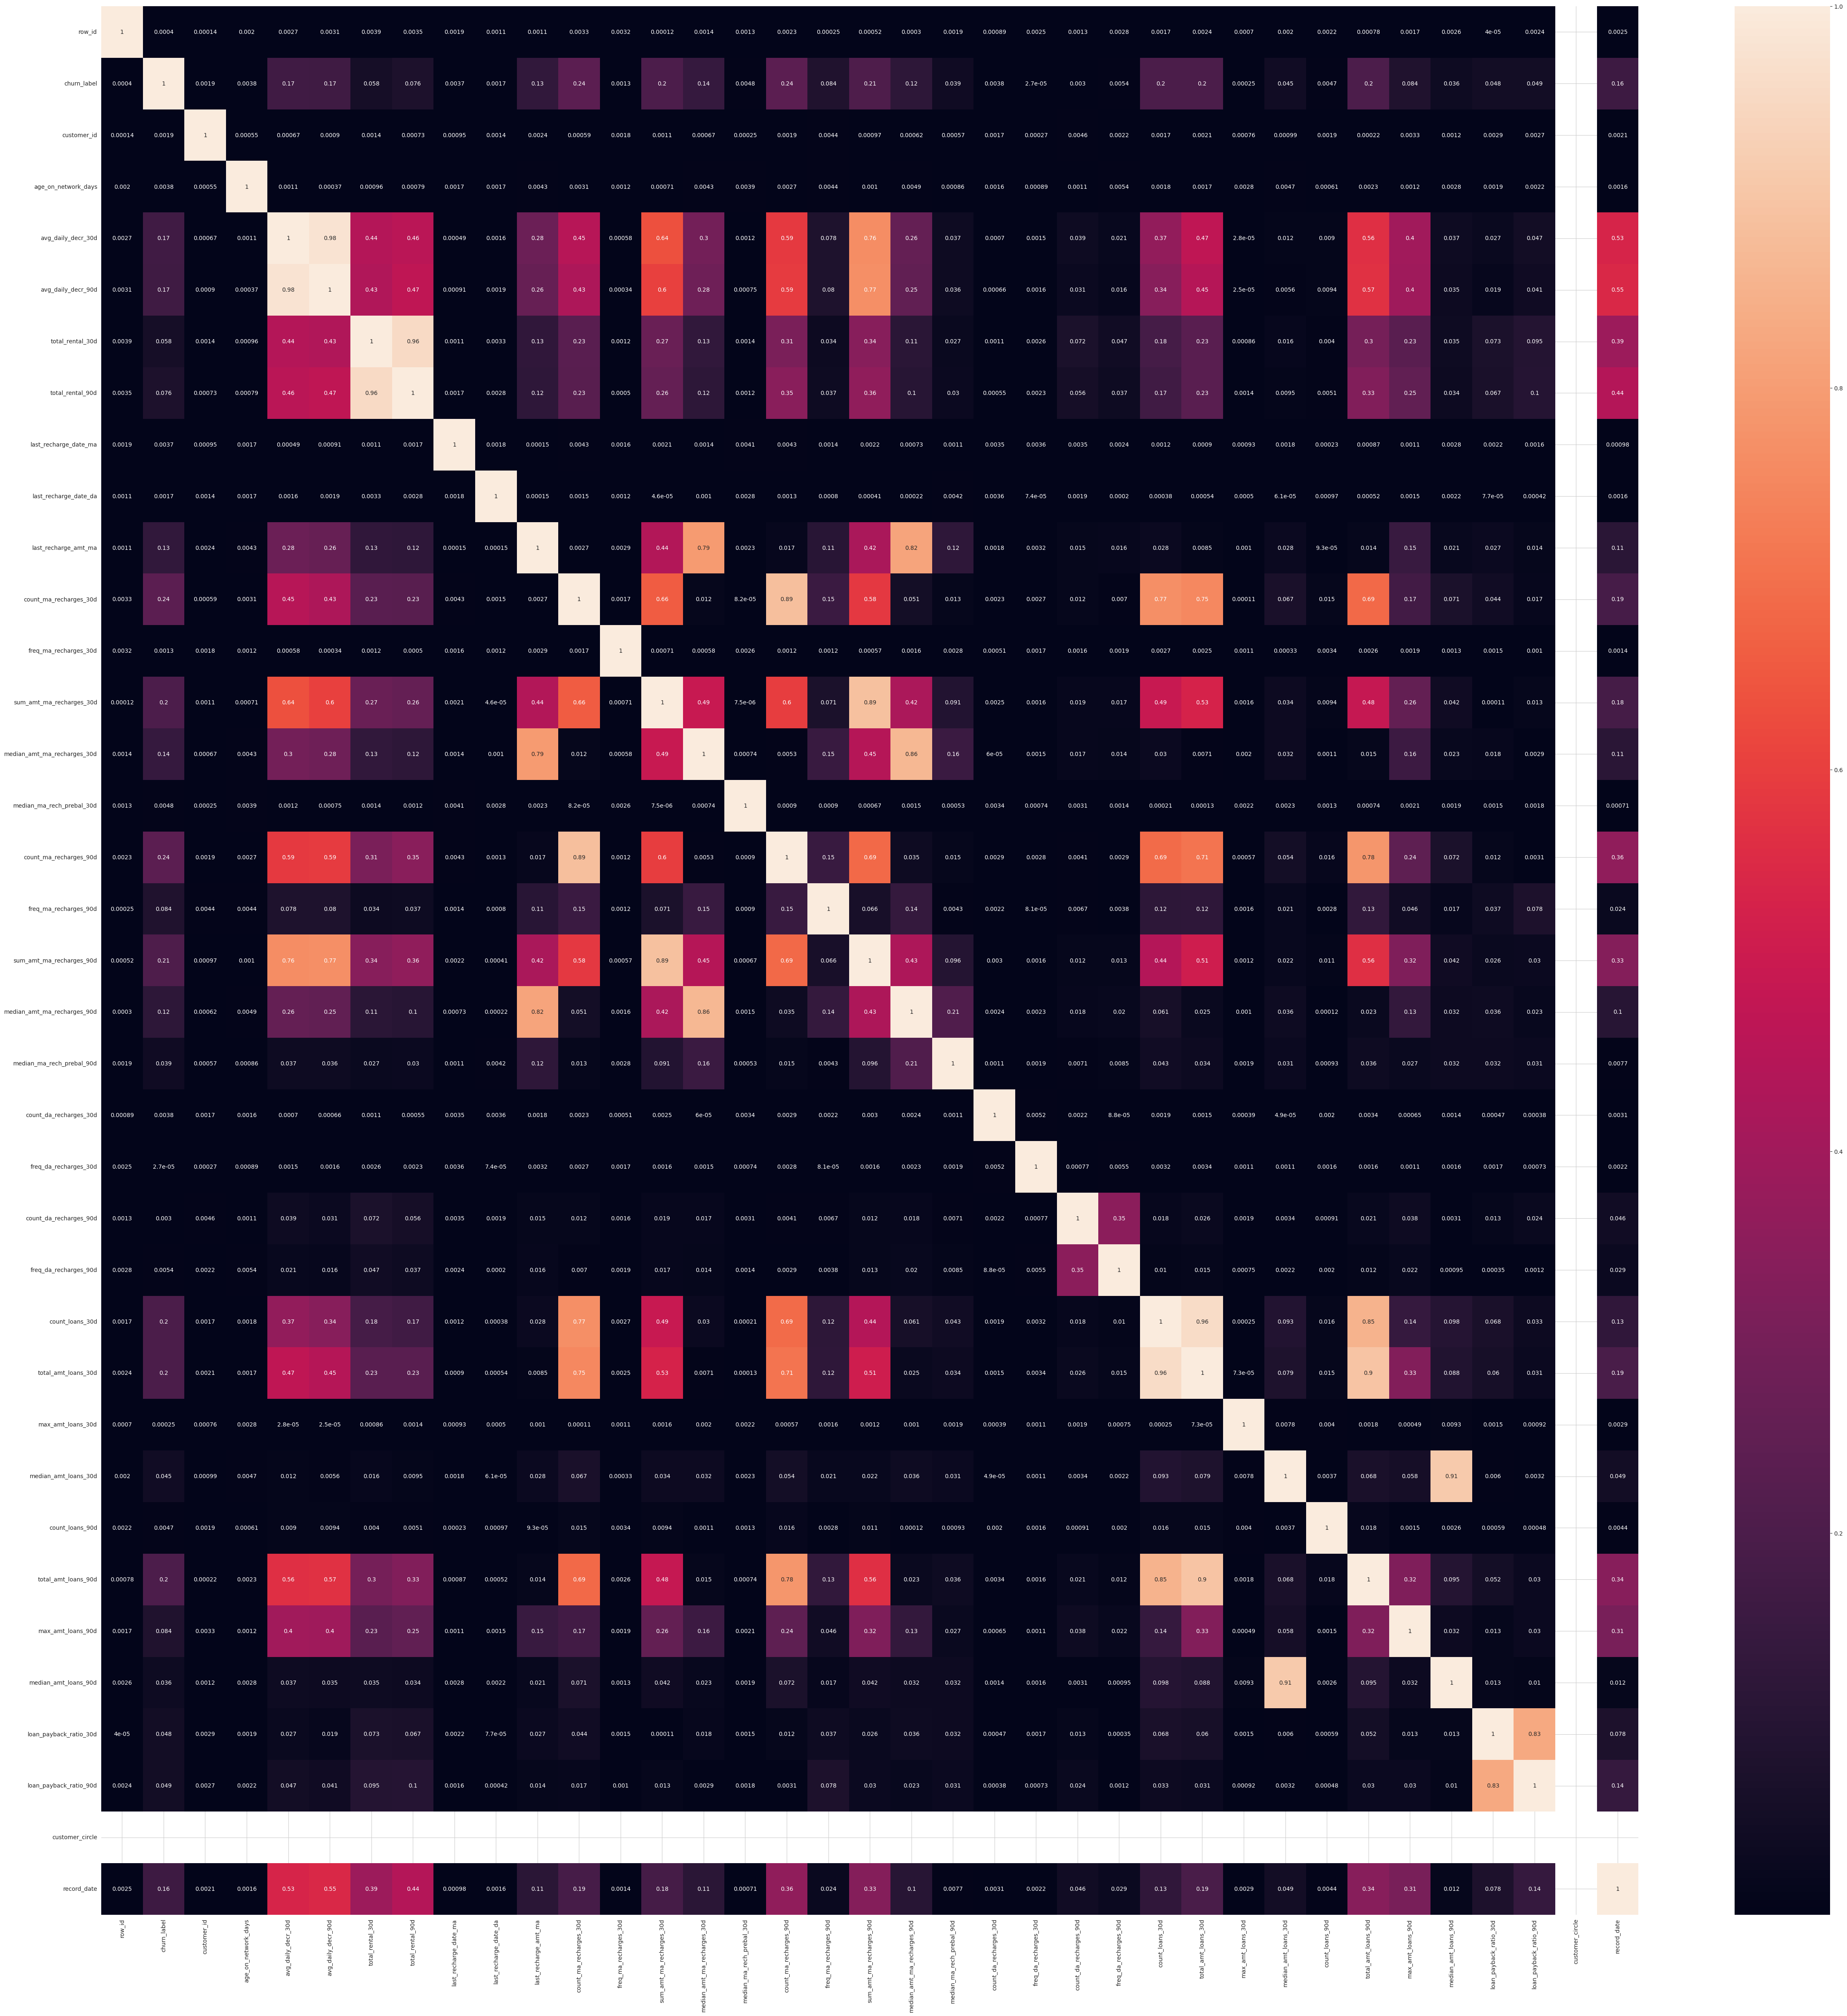

In [ ]:
plt.figure(figsize=(60,60))
sns.heatmap(abs(df_copy.corr()),annot=True)

<Axes: xlabel='churn_label'>

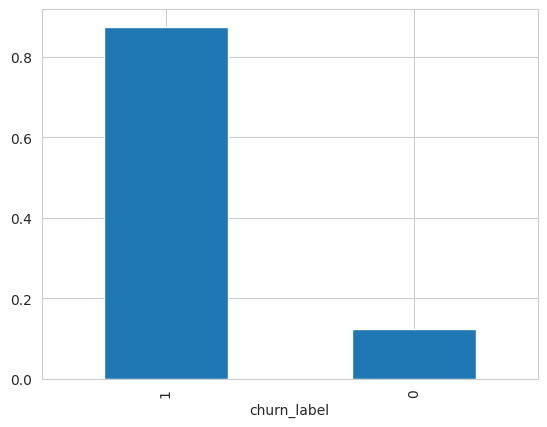

In [ ]:
df_copy['churn_label'].value_counts(normalize=True).plot(kind='bar')

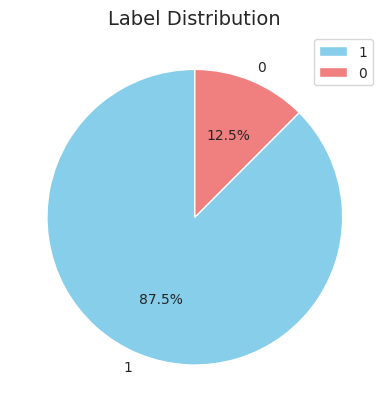

In [ ]:
import matplotlib.pyplot as plt
df_copy['churn_label'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'],
    legend=True
)
plt.ylabel("")
plt.title("Label Distribution", fontsize=14)
plt.show()

<Axes: title={'center': 'corr with label'}>

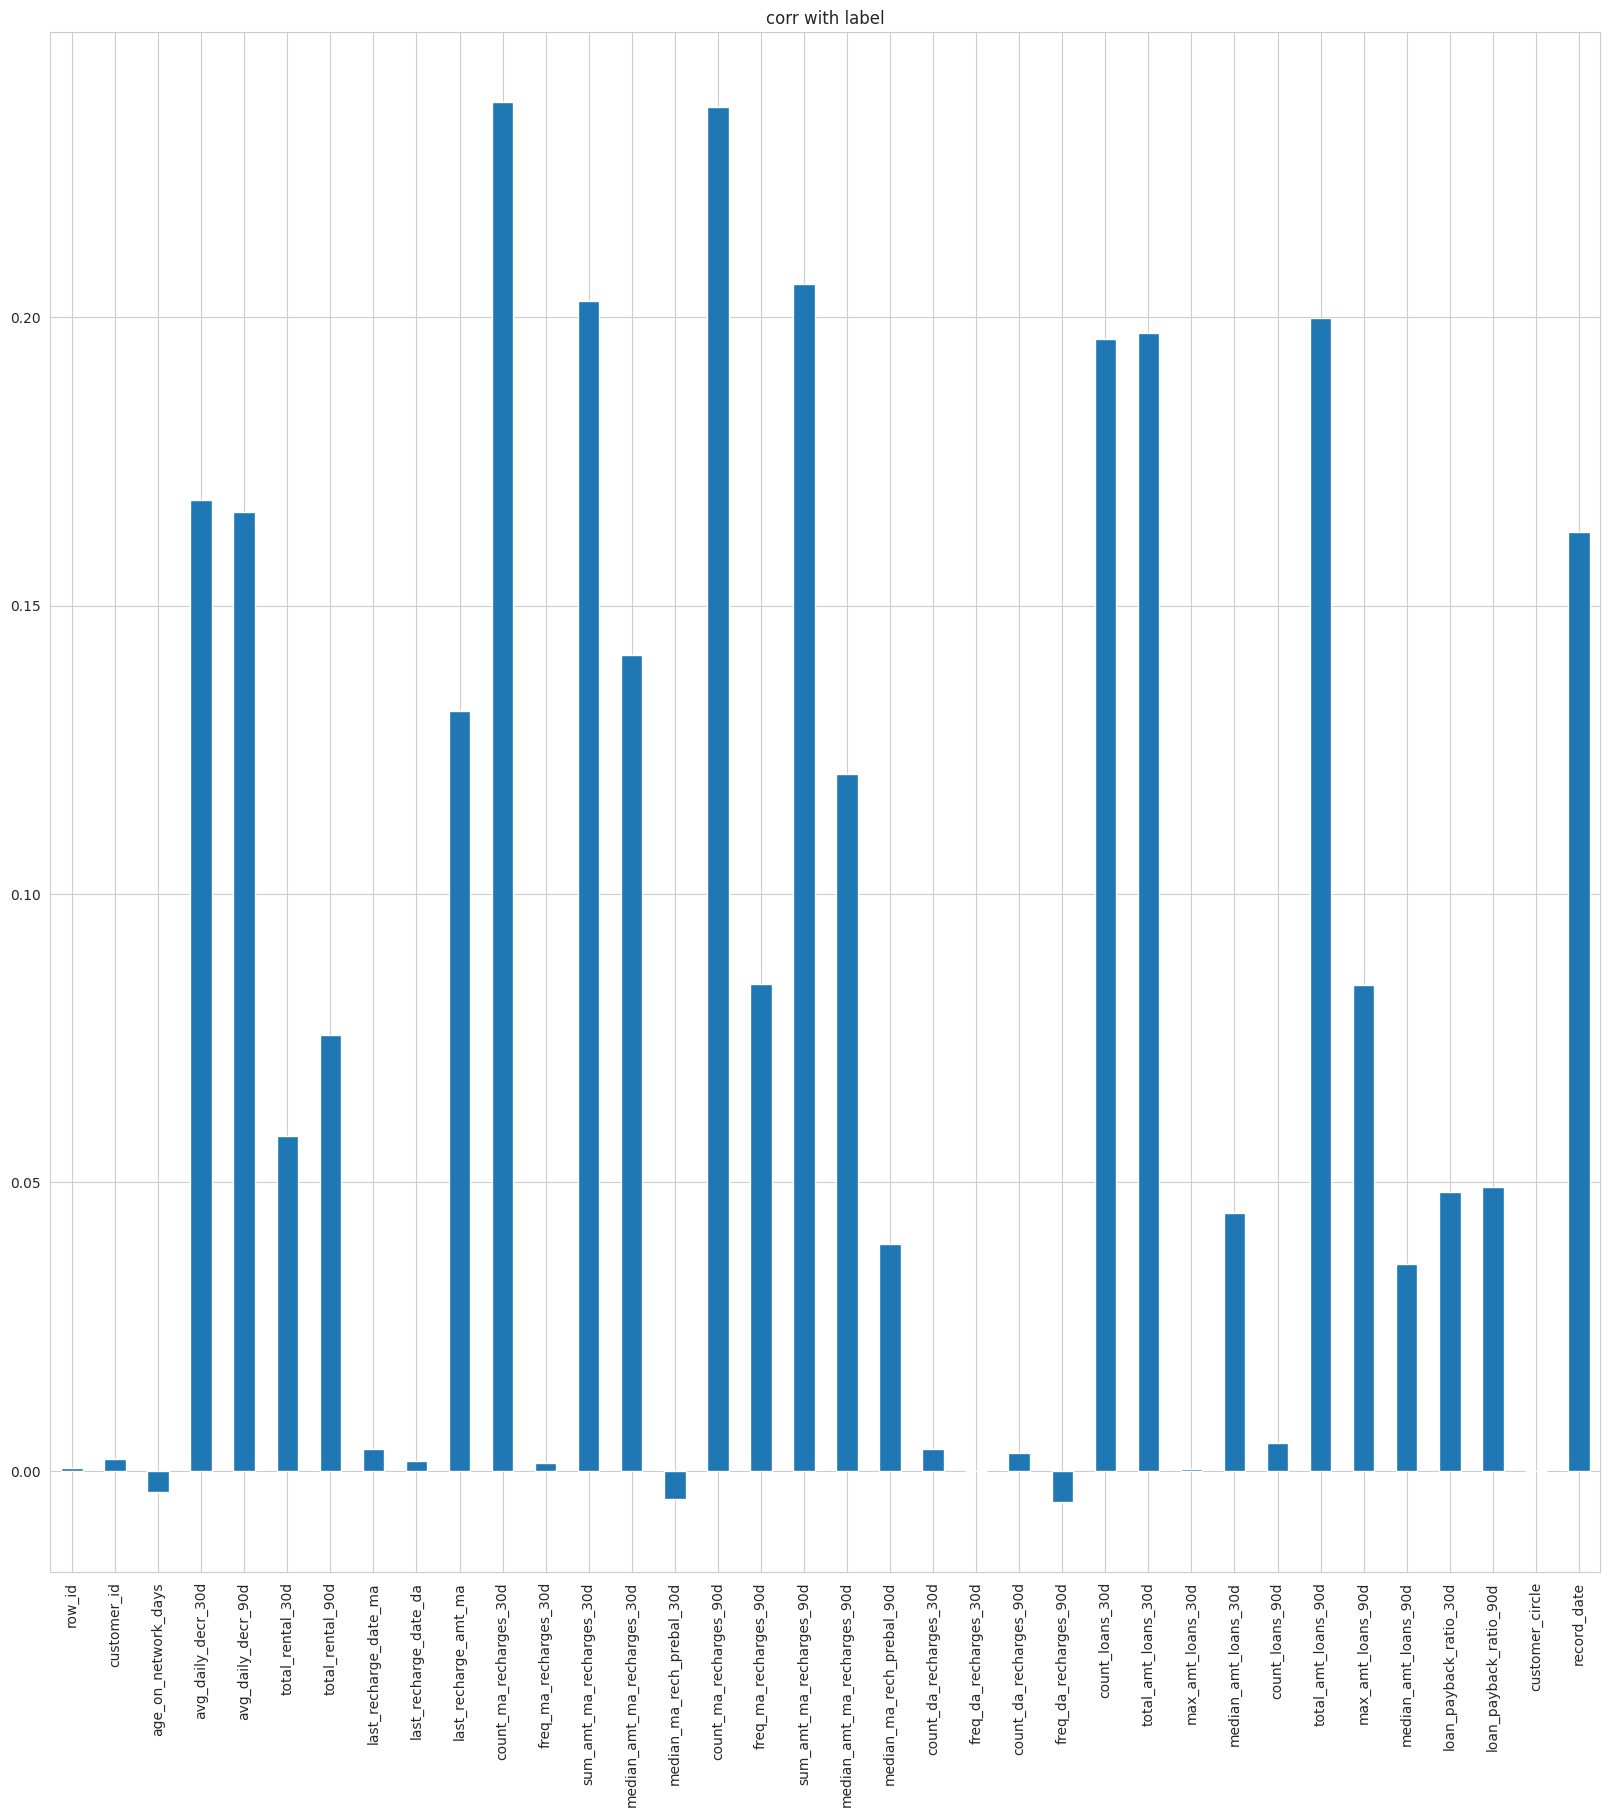

In [ ]:
df_copy.drop("churn_label",axis=1).corrwith(df["churn_label"]).plot(kind="bar",grid=True,title="corr with label",figsize=(20,20)) # corr with label

In [ ]:
df_copy['record_date'].dtype

dtype('int64')

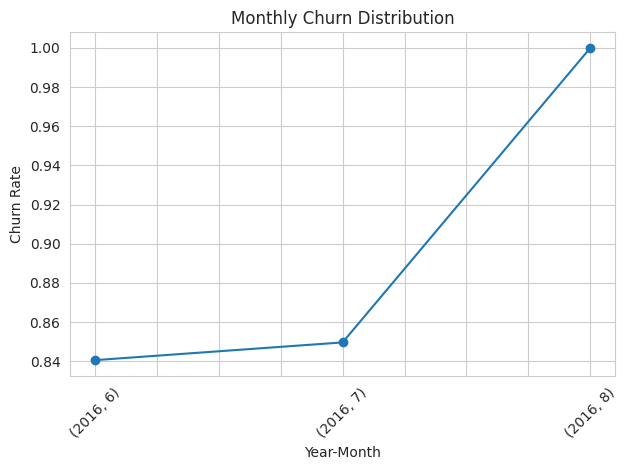

In [ ]:
import pandas as pd

df_copy['record_date'] = pd.to_datetime(
    df_copy['record_date'],
    unit='s',            # seconds
    errors='coerce'
)
df_copy['year'] = df_copy['record_date'].dt.year
df_copy['month'] = df_copy['record_date'].dt.month

import matplotlib.pyplot as plt

monthly_dist = df_copy.groupby(['year', 'month'])['churn_label'].mean()

plt.figure()
monthly_dist.plot(kind='line', marker='o')
plt.xlabel("Year-Month")
plt.ylabel("Churn Rate")
plt.title("Monthly Churn Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# CHECK OUTLIER

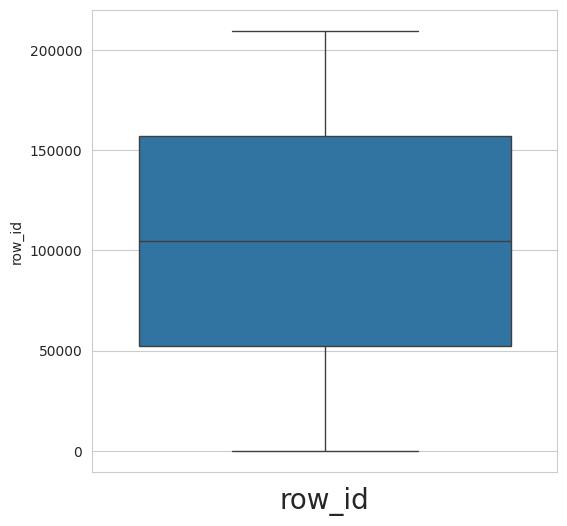

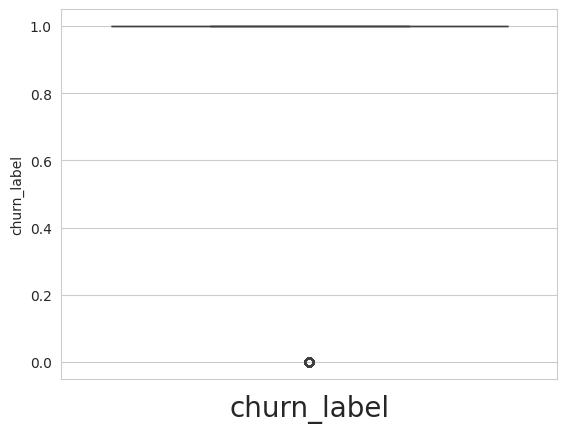

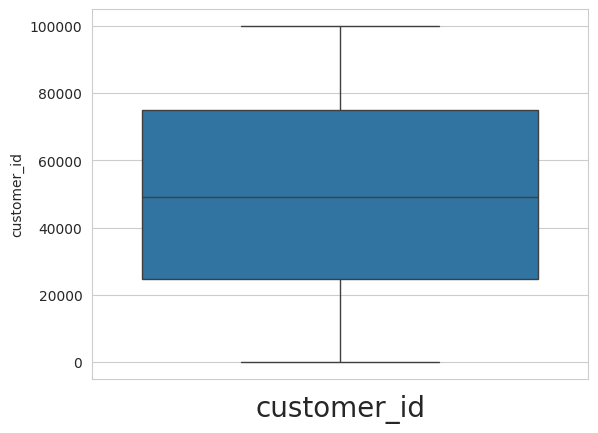

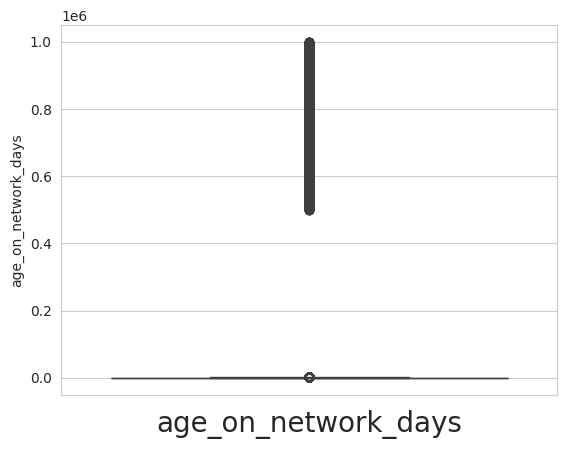

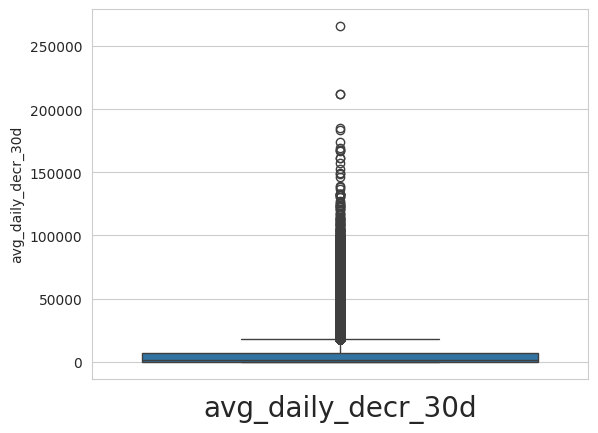

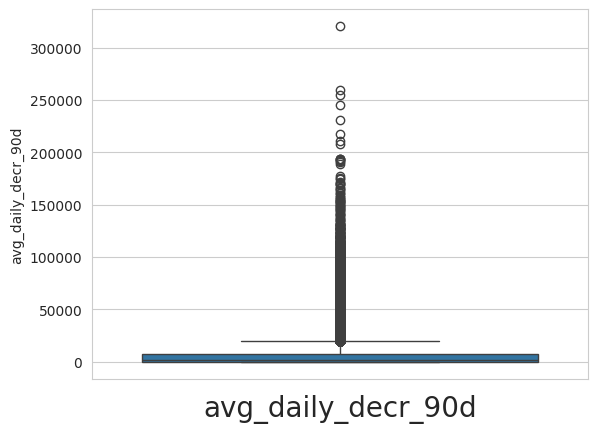

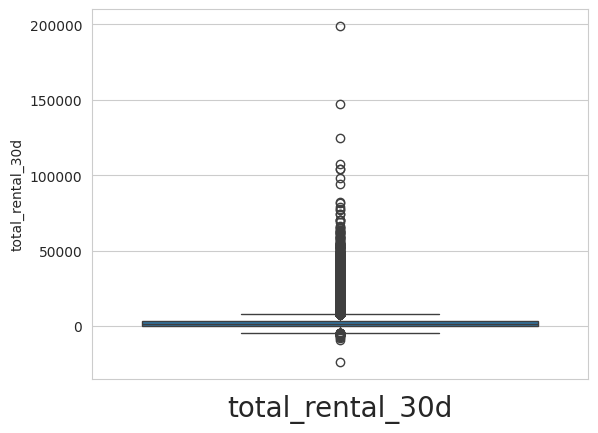

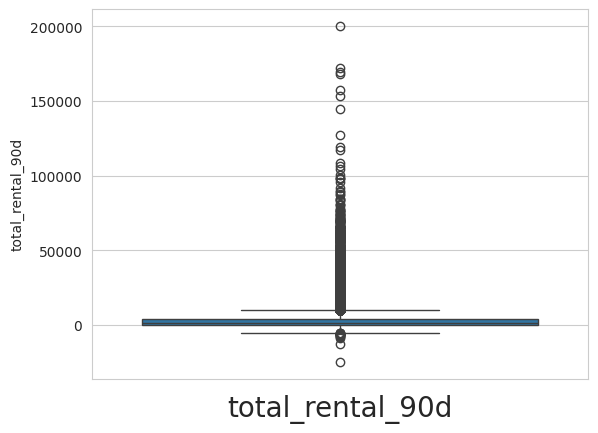

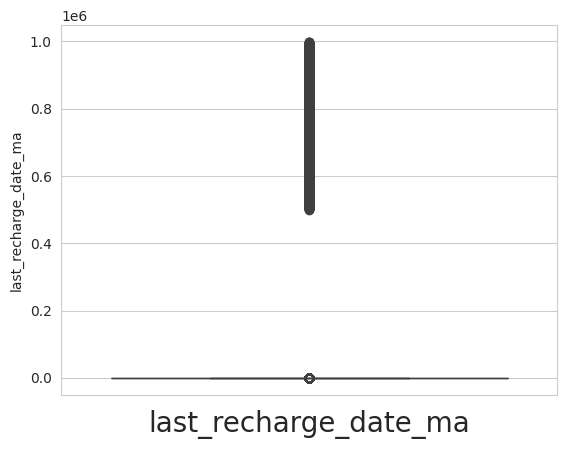

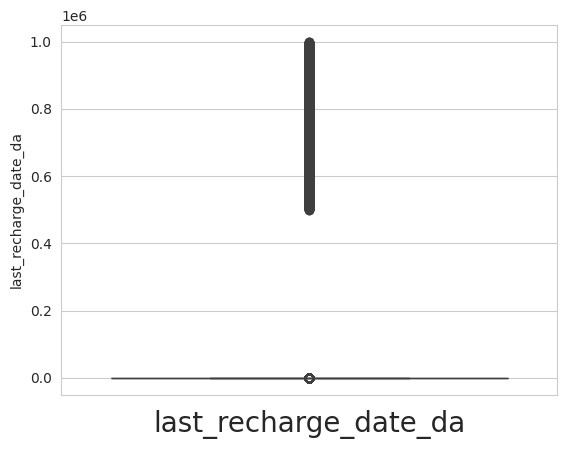

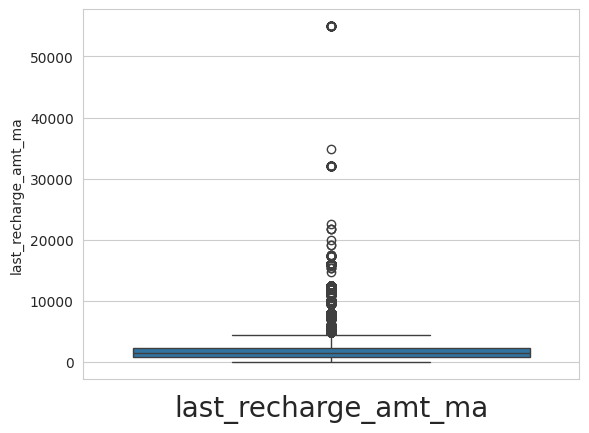

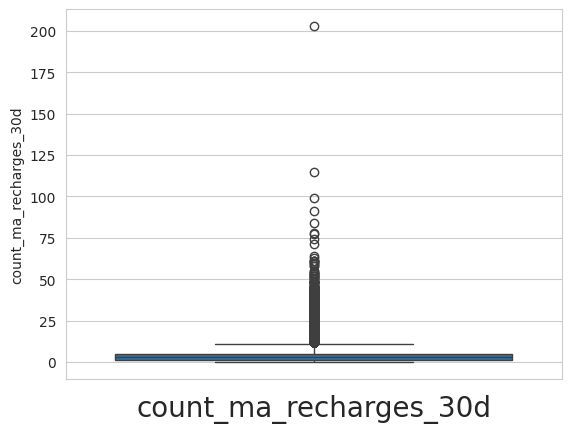

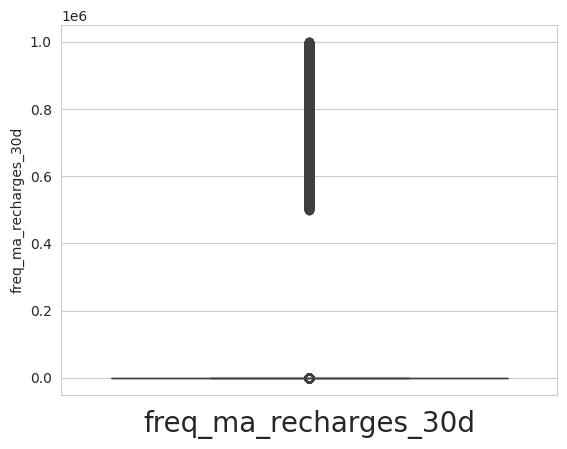

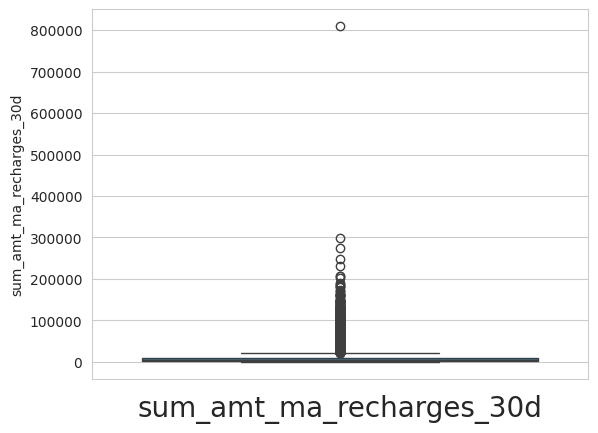

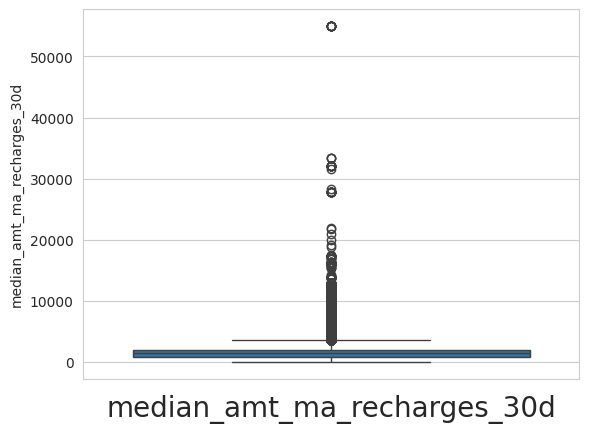

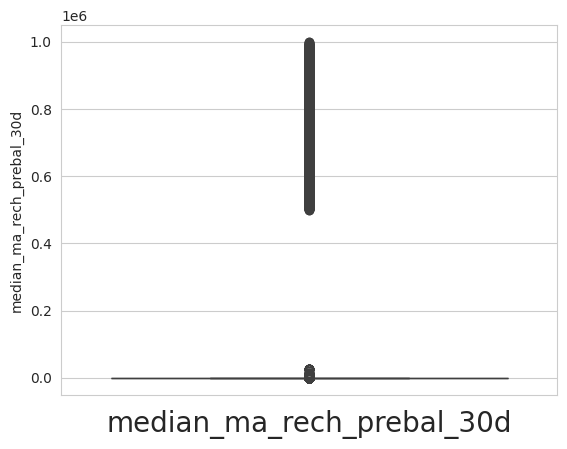

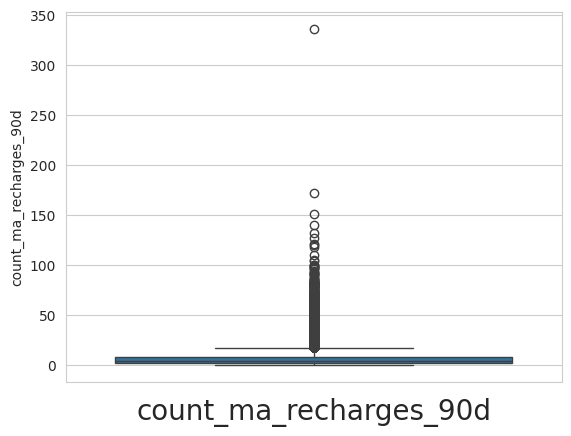

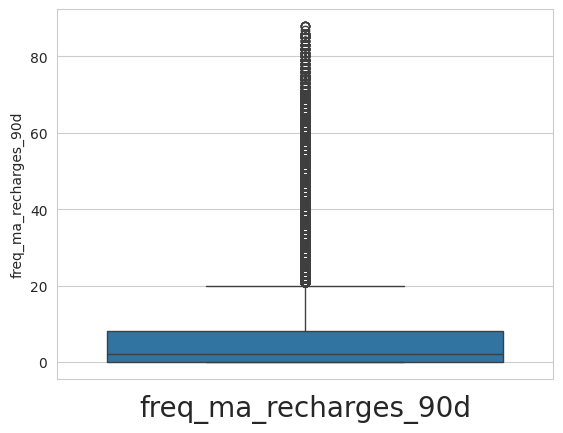

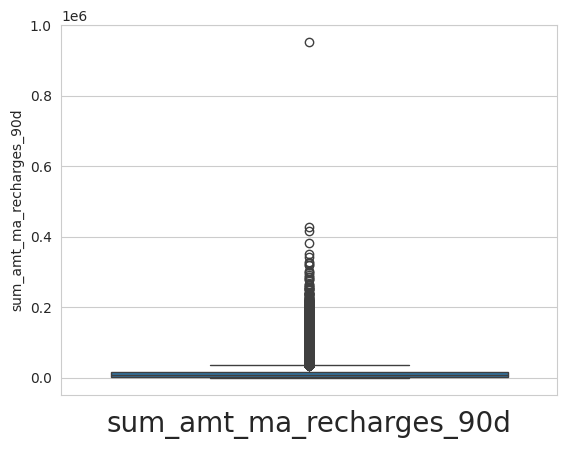

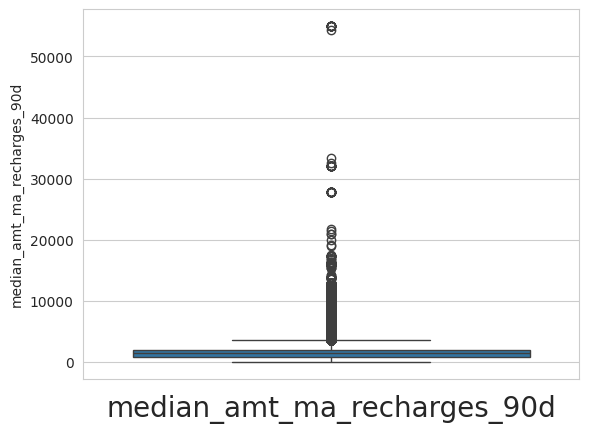

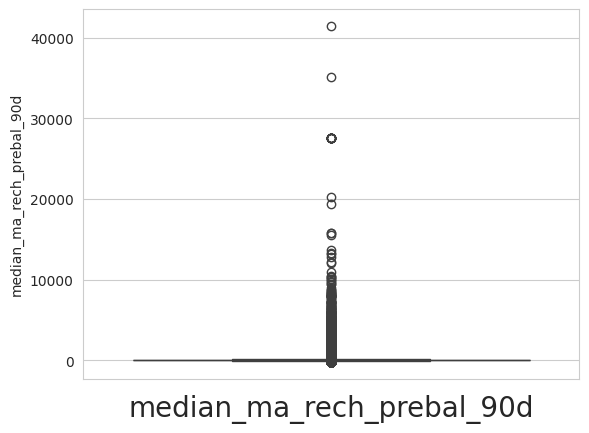

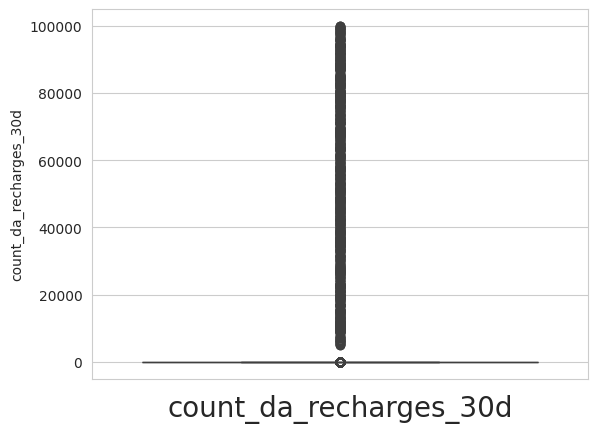

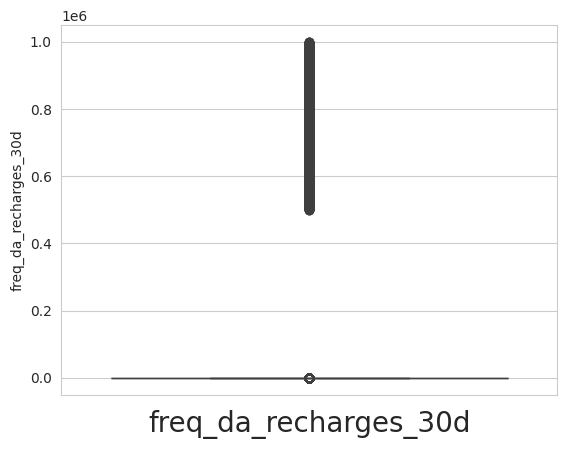

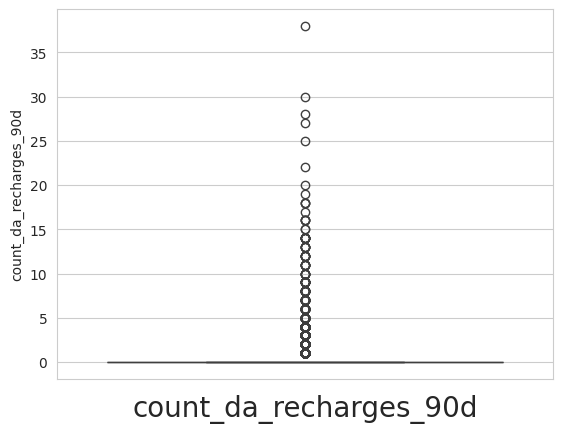

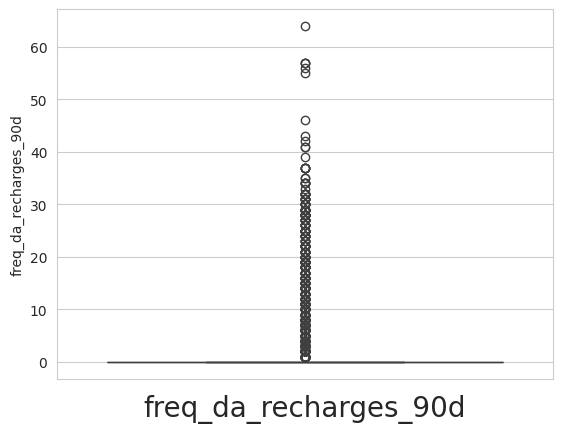

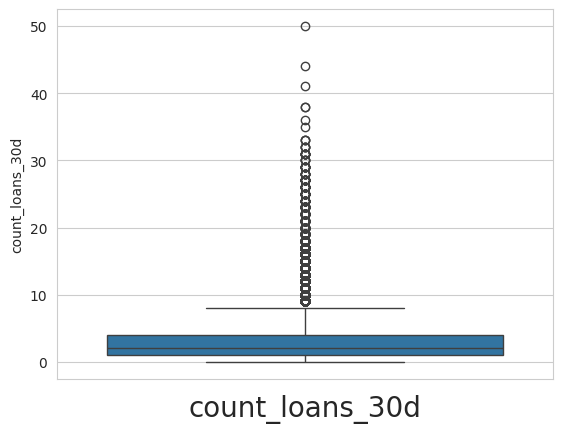

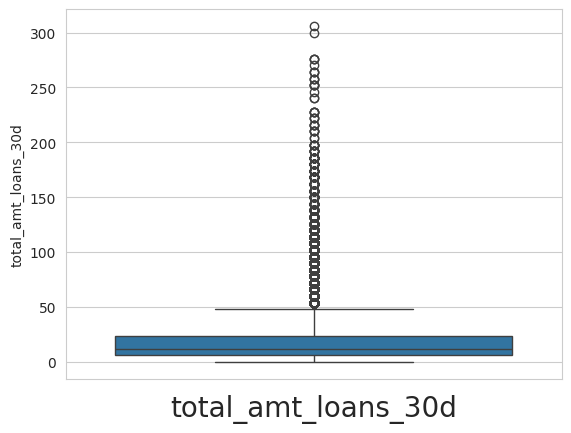

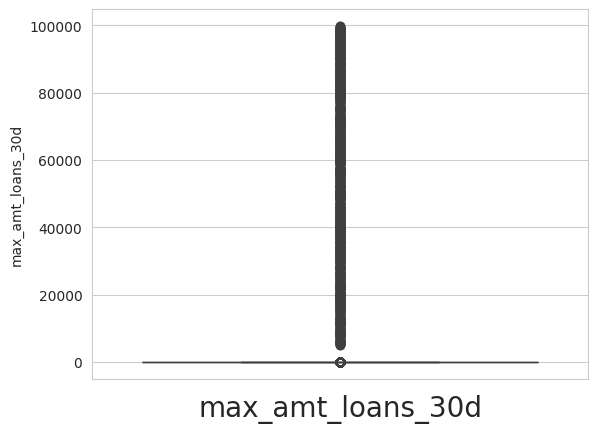

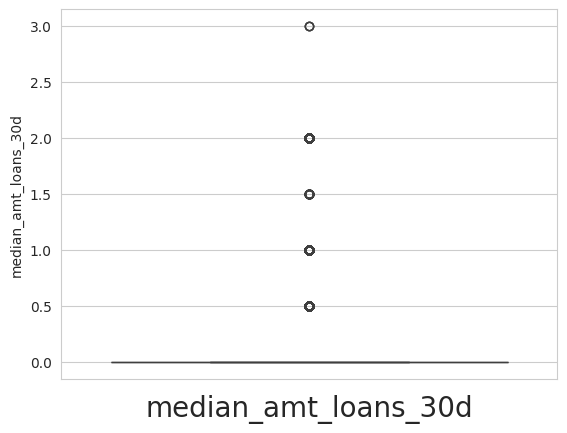

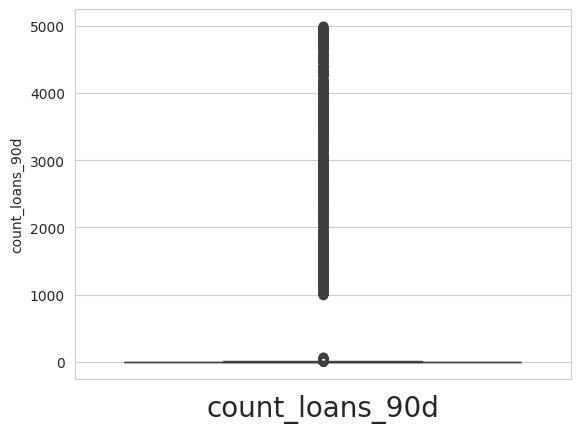

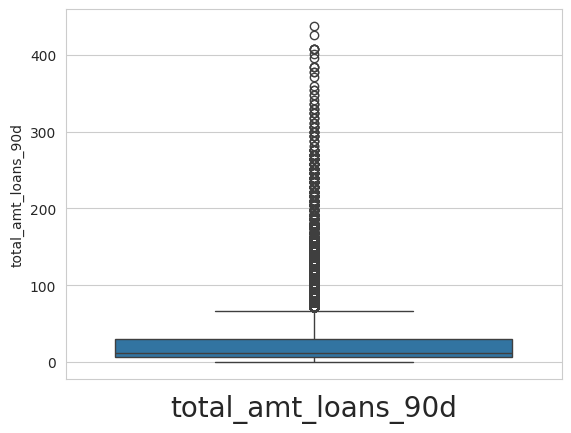

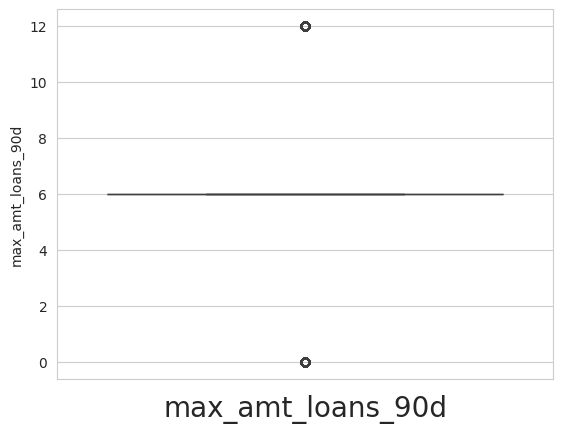

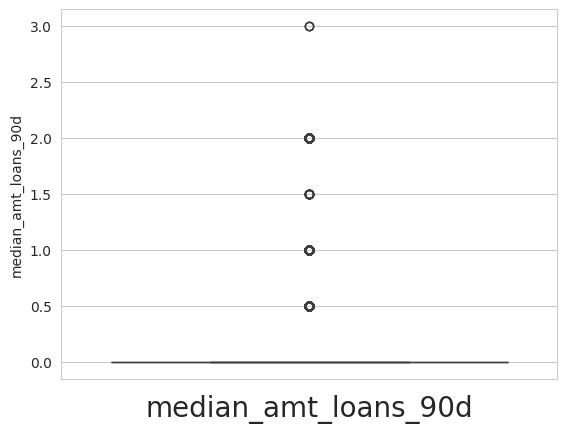

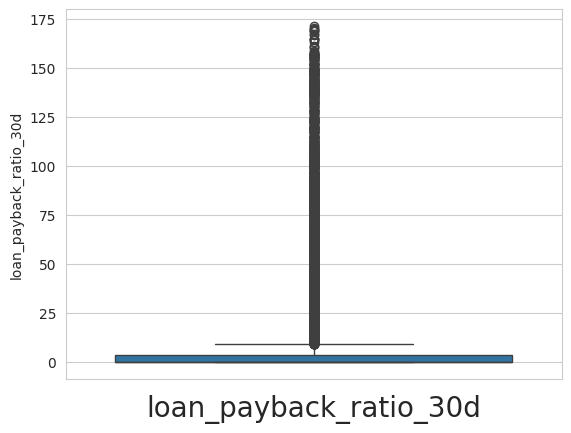

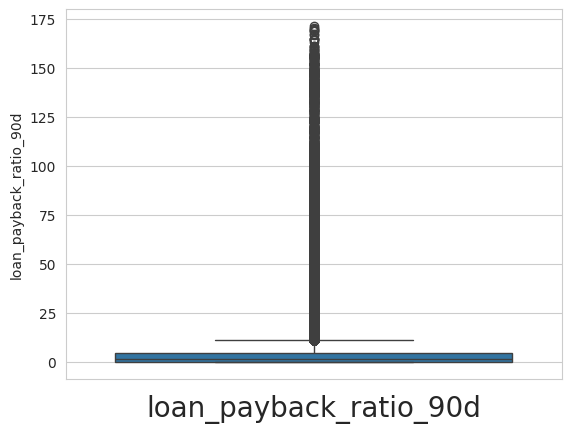

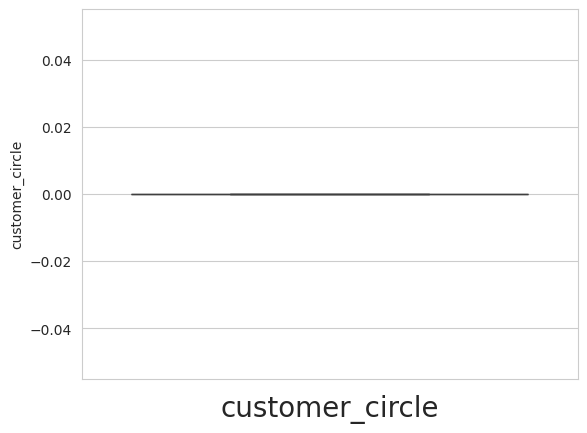

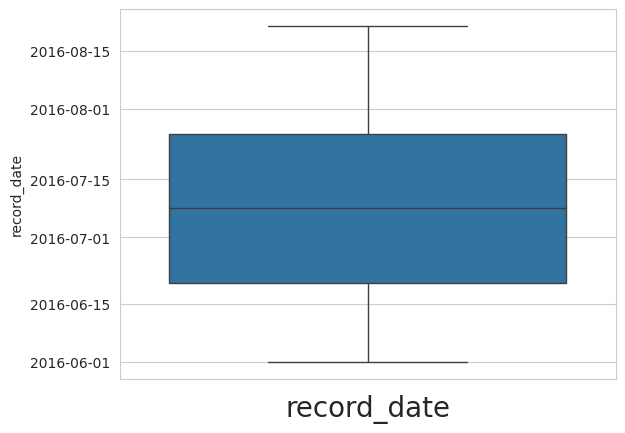

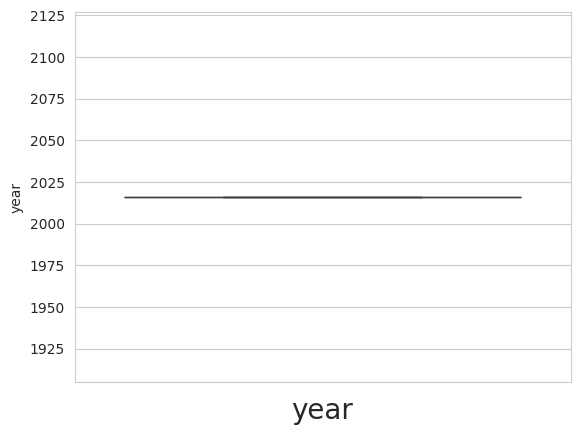

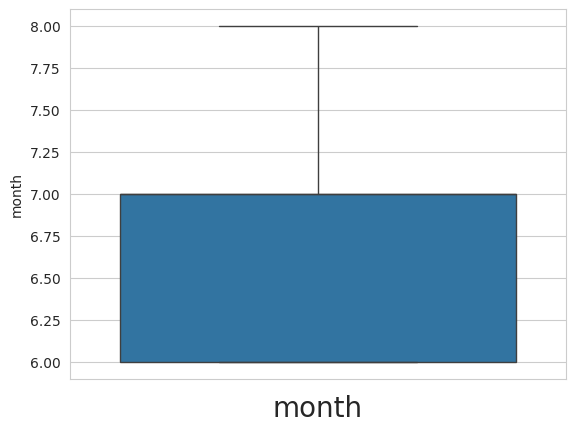

In [ ]:
plt.figure(figsize=(6,6))
graph=1
for num in df_copy[:34]:
    sns.boxplot(data=df_copy[num],orient="v")
    plt.xlabel(num,fontsize=20)
    plt.show()

In [ ]:
# print the histplot
#plt.figure(figsize=(20,20))
#graph=1
#for num in df[:34]:
#    plt.subplot(6,5,graph)
 #   sns.histplot(data=df[num],kde=True)
  #  plt.xlabel(num,fontsize=12)
   # graph+=1
#plt.show()

# Check Feature Importance

In [ ]:
df_copy.columns

Index(['row_id', 'churn_label', 'customer_id', 'age_on_network_days',
       'avg_daily_decr_30d', 'avg_daily_decr_90d', 'total_rental_30d',
       'total_rental_90d', 'last_recharge_date_ma', 'last_recharge_date_da',
       'last_recharge_amt_ma', 'count_ma_recharges_30d',
       'freq_ma_recharges_30d', 'sum_amt_ma_recharges_30d',
       'median_amt_ma_recharges_30d', 'median_ma_rech_prebal_30d',
       'count_ma_recharges_90d', 'freq_ma_recharges_90d',
       'sum_amt_ma_recharges_90d', 'median_amt_ma_recharges_90d',
       'median_ma_rech_prebal_90d', 'count_da_recharges_30d',
       'freq_da_recharges_30d', 'count_da_recharges_90d',
       'freq_da_recharges_90d', 'count_loans_30d', 'total_amt_loans_30d',
       'max_amt_loans_30d', 'median_amt_loans_30d', 'count_loans_90d',
       'total_amt_loans_90d', 'max_amt_loans_90d', 'median_amt_loans_90d',
       'loan_payback_ratio_30d', 'loan_payback_ratio_90d', 'customer_circle',
       'record_date', 'year', 'month'],
      dtype='obj

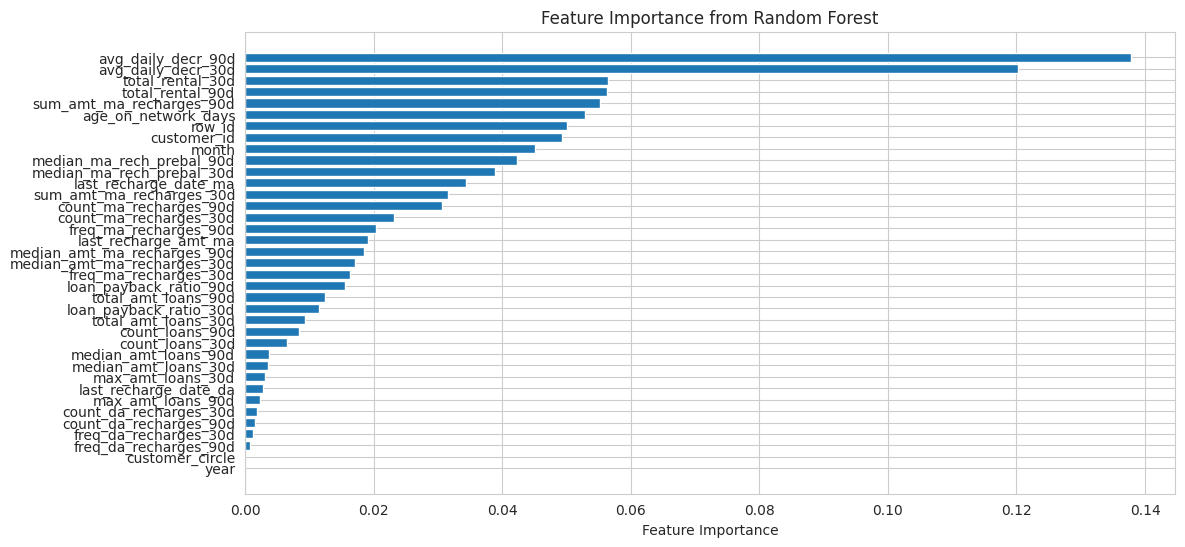

Top 10 features:
                         Feature  Importance
4            avg_daily_decr_90d    0.137784
3            avg_daily_decr_30d    0.120206
5              total_rental_30d    0.056417
6              total_rental_90d    0.056361
17     sum_amt_ma_recharges_90d    0.055257
2           age_on_network_days    0.052840
0                        row_id    0.050087
1                   customer_id    0.049221
36                        month    0.045088
19    median_ma_rech_prebal_90d    0.042304
14    median_ma_rech_prebal_30d    0.038943
7         last_recharge_date_ma    0.034441
12     sum_amt_ma_recharges_30d    0.031558
15       count_ma_recharges_90d    0.030612
10       count_ma_recharges_30d    0.023087
16        freq_ma_recharges_90d    0.020294
9          last_recharge_amt_ma    0.019094
18  median_amt_ma_recharges_90d    0.018464
13  median_amt_ma_recharges_30d    0.017165
11        freq_ma_recharges_30d    0.016353
33       loan_payback_ratio_90d    0.015589
29          to

In [ ]:
# check the feature importance
df_copy.drop(columns=["record_date"], inplace=True)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=df_copy.drop(columns=["churn_label"])
y=df_copy["churn_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()  # Highest importance at top
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.show()

print("Top 10 features:\n", feat_imp_df)


In [ ]:
# check the correlation with label
# selected_features=["max_amt_loans_90d","median_amt_loans_90d",
#                           "median_amt_loans_30d","max_amt_loans_30d","freq_da_recharges_30d","count_da_recharges_30d","freq_da_recharges_90d",
#                           "count_da_recharges_90d","last_recharge_date_da"]
# df[selected_features + ['churn_label']].corr()['churn_label']


In [ ]:
drop_columns=df.drop(columns=[
    "customer_id",
    "last_recharge_amt_ma",
    "freq_ma_recharges_90d",
    "total_amt_loans_90d",
    "freq_ma_recharges_30d",
    "loan_payback_ratio_90d",
    "count_loans_90d",
    "loan_payback_ratio_30d",
    "total_amt_loans_30d",
    "count_loans_30d",
    "last_recharge_date_da",
    "count_da_recharges_30d",
    "freq_da_recharges_30d",
    "median_amt_loans_30d",
    "max_amt_loans_30d",
    "count_da_recharges_90d",
    "freq_da_recharges_90d",
    "median_amt_loans_90d",
    "max_amt_loans_90d",
    "customer_circle",
    "record_date",
    "row_id"


],axis=1)



In [ ]:
def cap_outliers(df, target_col):
    df_capped = drop_columns.copy()
    numeric_cols = drop_columns.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != target_col]

    for col in numeric_cols:
        Q1 = drop_columns[col].quantile(0.25)
        Q3 = drop_columns[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_capped[col] = np.where(drop_columns[col] < lower_bound, lower_bound,
                           np.where(drop_columns[col] > upper_bound, upper_bound,drop_columns[col]))
    return df_capped
df_capped = cap_outliers(df, target_col='churn_label')

In [ ]:
import pandas as pd
drop_columns['days_since_last_recharge'] = (pd.Timestamp.today() - pd.to_datetime(drop_columns['last_recharge_date_ma'])).dt.days

drop_columns.drop('last_recharge_date_ma', axis=1, inplace=True)

In [ ]:
drop_columns.to_csv("final_data.csv", index=False)

print("Dataset saved successfully in CSV format")

Dataset saved successfully in CSV format


In [ ]:
final_dataset=pd.read_csv("final_data.csv")
print(final_dataset.shape)
print(final_dataset.info())
print(final_dataset.isnull().sum())

(209593, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   churn_label                  209593 non-null  int64  
 1   age_on_network_days          209593 non-null  float64
 2   avg_daily_decr_30d           209593 non-null  float64
 3   avg_daily_decr_90d           209593 non-null  float64
 4   total_rental_30d             209593 non-null  float64
 5   total_rental_90d             209593 non-null  float64
 6   count_ma_recharges_30d       209593 non-null  int64  
 7   sum_amt_ma_recharges_30d     209593 non-null  float64
 8   median_amt_ma_recharges_30d  209593 non-null  float64
 9   median_ma_rech_prebal_30d    209593 non-null  float64
 10  count_ma_recharges_90d       209593 non-null  int64  
 11  sum_amt_ma_recharges_90d     209593 non-null  int64  
 12  median_amt_ma_recharges_90d  209593 non-null 

In [ ]:
X=final_dataset.drop(columns=["churn_label"])
y=final_dataset["churn_label"]
X.to_csv("x_test.csv", index=False)


# CHECK RANDOM STATE FOR TRAIN_TEST_SPLIT

In [ ]:

# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# lr = LogisticRegression()


# for i in range(0, 150):
#     x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
#     lr.fit(x_train, y_train)

#     pred_train = lr.predict(x_train)
#     pred_test = lr.predict(x_test)

#     train_r2 = accuracy_score(y_train, pred_train) * 100
#     test_r2 = accuracy_score(y_test, pred_test) * 100
#     if round(train_r2, 1) == round(test_r2, 1):
#         print("Random state:", i)
#         print("Training accuracy_score:", train_r2)
#         print("Testing accuracy_score:", test_r2)

random_state=149

**TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=149)
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (167674, 14)
shape of x_test (41919, 14)
shape of y_train (167674,)
shape of y_test (41919,)


 normalization and standization**

In [ ]:
# from scipy.stats import boxcox
# from sklearn.preprocessing import PowerTransformer
# import numpy as np

# pt = PowerTransformer(method='yeo-johnson', standardize=True)

# x = pt.fit_transform(x_train)
# x_test_pt=pt.transform(x_test)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train_sc = scaler.fit_transform(x)
# x_test=scaler.transform(x_test_pt)

In [ ]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# print(y_train.value_counts())
# R_SMP = SMOTE(sampling_strategy=0.80)
# x_train_ns, y_train_ns = R_SMP.fit_resample(x_train_sc, y_train)
# print("Before resampling, class distribution:", Counter(y_train))
# print("After resampling, class distribution:", Counter(y_train_ns))

# Trained the model

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix,
    accuracy_score
)

import xgboost as xgb
import numpy as np

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    # "SVC": SVC(probability=True, random_state=42),
    "XGBoost": xgb.XGBClassifier(
        eval_metric="logloss",
        random_state=42,
        use_label_encoder=False
    )
}

for name, model in models.items():

    pipeline = Pipeline([
        ("power", PowerTransformer(method="yeo-johnson")),
        ("scaler", StandardScaler()),
        ("smote", SMOTE(sampling_strategy=0.8, random_state=42)),
        ("model", model)
    ])

    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)


    if hasattr(pipeline.named_steps["model"], "predict_proba"):
        y_proba = pipeline.predict_proba(x_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    else:
        roc = "Not Available"

    print(f"\n🚀 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC-AUC:", roc)



🚀 Model: LogisticRegression
Accuracy: 0.7737541448984947
Confusion Matrix:
 [[ 3801  1411]
 [ 8073 28634]]
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.73      0.44      5212
           1       0.95      0.78      0.86     36707

    accuracy                           0.77     41919
   macro avg       0.64      0.75      0.65     41919
weighted avg       0.87      0.77      0.81     41919

ROC-AUC: 0.8314035158548788

🚀 Model: DecisionTree
Accuracy: 0.83346453875331
Confusion Matrix:
 [[ 2820  2392]
 [ 4589 32118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.54      0.45      5212
           1       0.93      0.87      0.90     36707

    accuracy                           0.83     41919
   macro avg       0.66      0.71      0.67     41919
weighted avg       0.86      0.83      0.85     41919

ROC-AUC: 0.7079169055460887

🚀 Model: RandomForest
Accuracy: 0

# CROSSVALIDATION

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_models(models, X, y):
    scores = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ("power", PowerTransformer(method="yeo-johnson")),
            ("scaler", StandardScaler()),
            ("smote", SMOTE(random_state=42)),
            ("model", model)
        ])

        cv_score = cross_val_score(
            pipeline,
            X,
            y,
            cv=cv,
            scoring="roc_auc",
            n_jobs=-1
        )

        scores[name] = cv_score.mean()

    return scores


models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "SGDClassifier": SGDClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        eval_metric="logloss",
        use_label_encoder=False,
        random_state=42
    ),
    "KNN": KNeighborsClassifier()
}

results = evaluate_models(models, x_train, y_train)

for model, score in results.items():
    print(f"{model}: {score:.4f}")


# * Apply Hyperparameter Tuninig

# XGBCLASSIFIER

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from xgboost import XGBClassifier

pipeline = Pipeline([
    ("power", PowerTransformer(method="yeo-johnson")),
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("model", XGBClassifier(
        eval_metric="mlogloss",
        random_state=42,
        use_label_encoder=False
    ))
])

param_grid = {
    "model__n_estimators": [100, 200, 300, 500],
    "model__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "model__max_depth": [3, 5, 7, 9],
    "model__min_child_weight": [1, 3, 5],
    "model__subsample": [0.6, 0.8, 1.0],
    "model__colsample_bytree": [0.6, 0.8, 1.0],
    "model__gamma": [0, 0.1, 0.2],
    "model__reg_alpha": [0, 0.01, 0.1],
    "model__reg_lambda": [1, 1.5, 2],
    "model__scale_pos_weight": [1, 2, 3, 5]
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=10,
    scoring="accuracy",
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train, y_train)

best_model = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)

y_pred = best_model.predict(x_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:
 {'model__subsample': 0.6, 'model__scale_pos_weight': 5, 'model__reg_lambda': 2, 'model__reg_alpha': 0.01, 'model__n_estimators': 500, 'model__min_child_weight': 5, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'model__gamma': 0, 'model__colsample_bytree': 1.0}

Accuracy: 0.9095159712779408

Confusion Matrix:
 [[ 2160  3052]
 [  741 35966]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.41      0.53      5212
           1       0.92      0.98      0.95     36707

    accuracy                           0.91     41919
   macro avg       0.83      0.70      0.74     41919
weighted avg       0.90      0.91      0.90     41919



# GradientBoostingClassifier

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pipeline_gbc = Pipeline([
    ("power", PowerTransformer(method="yeo-johnson")),
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(random_state=42))
])

param_grid_gbc = {
    "model__n_estimators": [100, 200, 300],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [3, 4, 5],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2", None],
    "model__subsample": [0.8, 1.0],
    "model__min_impurity_decrease": [0.0, 0.001]
}

random_search_gbc = RandomizedSearchCV(
    estimator=pipeline_gbc,
    param_distributions=param_grid_gbc,
    n_iter=10,
    scoring="accuracy",
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_gbc.fit(x_train, y_train)

best_model_gbc = random_search_gbc.best_estimator_
print("Best parameters found:\n", random_search_gbc.best_params_)

predictions_gbc = best_model_gbc.predict(x_test)

print("\nAccuracy:\n", accuracy_score(y_test, predictions_gbc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions_gbc))
print("\nClassification Report:\n", classification_report(y_test, predictions_gbc))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:
 {'model__subsample': 1.0, 'model__n_estimators': 200, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__min_impurity_decrease': 0.0, 'model__max_features': None, 'model__max_depth': 3, 'model__learning_rate': 0.1}

Accuracy:
 0.8316753739354469

Confusion Matrix:
 [[ 3730  1482]
 [ 5574 31133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.72      0.51      5212
           1       0.95      0.85      0.90     36707

    accuracy                           0.83     41919
   macro avg       0.68      0.78      0.71     41919
weighted avg       0.89      0.83      0.85     41919



# RandomForestClassifier

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pipeline_rf = Pipeline([
    ("power", PowerTransformer(method="yeo-johnson")),
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("model", RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    "model__n_estimators": [200, 500, 800, 1000],
    "model__max_depth": [10, 20, 30, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2"],
    "model__bootstrap": [True]
}

random_search_rf = RandomizedSearchCV(
    estimator=pipeline_rf,
    param_distributions=param_grid_rf,
    n_iter=10,
    scoring="accuracy",
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(x_train, y_train)

best_model_rf = random_search_rf.best_estimator_
print("Best parameters found:\n", random_search_rf.best_params_)

predictions_rf = best_model_rf.predict(x_test)

print("\nAccuracy Score:", accuracy_score(y_test, predictions_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions_rf))
print("\nClassification Report:\n", classification_report(y_test, predictions_rf))


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best parameters found:
 {'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 30, 'model__bootstrap': True}

Accuracy Score: 0.8868770724492474

Confusion Matrix:
 [[ 3014  2198]
 [ 2544 34163]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.58      0.56      5212
           1       0.94      0.93      0.94     36707

    accuracy                           0.89     41919
   macro avg       0.74      0.75      0.75     41919
weighted avg       0.89      0.89      0.89     41919



# XGBOOSTCLASSIFIER IS THE BEST MODEL WITH HYPERPARAMETER TUNING and CROSSVALIDATION

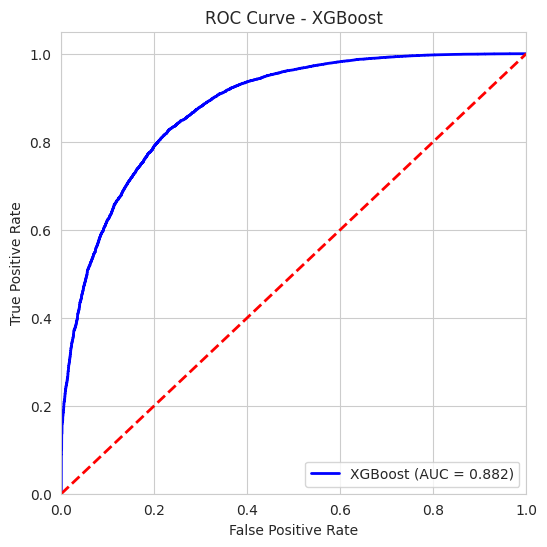

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_proba = best_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBoost (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()


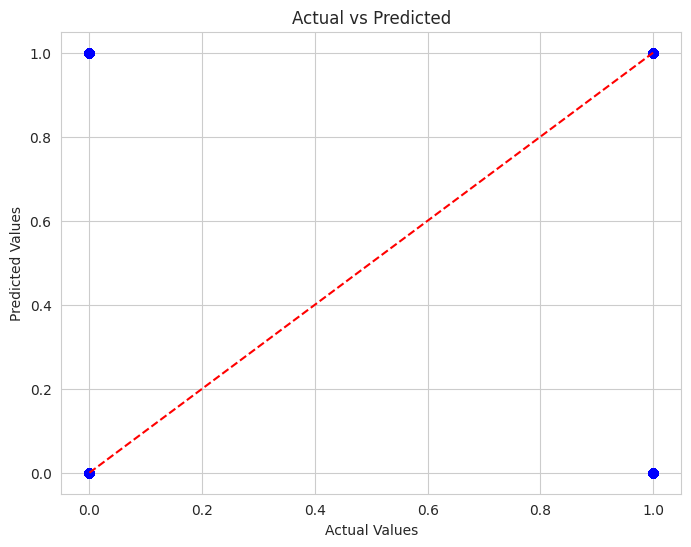

In [ ]:
import matplotlib.pyplot as plt
y_pred = best_model.predict(x_test)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


# Save The XGBOOST Model

In [ ]:
import pickle
import joblib
with open("best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)
joblib.dump(x_train.columns.tolist(), "feature_columns.pkl")


print("Model saved to best_model_xgb_2.pkl")
with open("best_model.pkl", "rb") as file:
    loaded_model_xgboost = pickle.load(file)

loaded_model_xgboost.predict(x_test)


Model saved to best_model_xgb_2.pkl


array([1, 1, 1, ..., 1, 1, 1])